In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
filepath = "/Users/akshitagrawal/Desktop/intern/shodh/archive/accepted_2007_to_2018q4.csv/accepted_2007_to_2018q4.csv"

print("Loading dataset...")
if filepath.endswith('.csv'):
    df = pd.read_csv(filepath)
elif filepath.endswith(('.xlsx', '.xls')):
    df = pd.read_excel(filepath)
else:
    raise ValueError("Unsupported file format. Use CSV or Excel.")


sample_frac = 0.2
df = df.sample(frac=sample_frac, random_state=42)

print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns\n")


Loading dataset...


/var/folders/5s/_vf4vsjd37s908q2cztz0nbh0000gn/T/ipykernel_67780/1430210977.py:5: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Dataset loaded successfully: 452140 rows, 151 columns



In [5]:

print("-----------DATASET INFORMATION-----------")
print("\n1. Column Names and Data Types:")
print(df.dtypes)
print("\n2. Dataset Info:")
df.info()


-----------DATASET INFORMATION-----------

1. Column Names and Data Types:
id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

2. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 452140 entries, 392949 to 867240
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 524.3+ MB


In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
392949,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1273506,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
324024,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2066630,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
477199,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe(include='all')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,452140.0,0.0,452134.000000,452134.000000,452134.000000,452134,452134.000000,452134.000000,452134,452134,...,2139.000000,2139.000000,452134,452134,6911,6911,6911,6911.000000,6911.000000,6911.000000
unique,452140.0,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,2,2,72,3,75,NaN,NaN,NaN
top,39651438.0,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,C1,...,NaN,NaN,Cash,N,Mar-2019,COMPLETE,Jan-2019,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN,NaN,322169,NaN,NaN,132737,29191,...,NaN,NaN,436318,445223,557,3016,344,NaN,NaN,NaN
mean,NaN,NaN,15038.632850,15033.657776,15015.775097,NaN,13.089122,445.674627,NaN,NaN,...,11557.012324,194.588696,NaN,NaN,NaN,NaN,NaN,4950.587484,47.726025,13.096223
std,NaN,NaN,9181.766433,9179.968213,9183.440150,NaN,4.832227,267.068887,NaN,NaN,...,7507.069102,200.346312,NaN,NaN,NaN,NaN,NaN,3690.175749,6.909337,8.128784
min,NaN,NaN,500.000000,500.000000,0.000000,NaN,5.310000,15.760000,NaN,NaN,...,327.140000,0.010000,NaN,NaN,NaN,NaN,NaN,133.000000,15.000000,0.000000
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,NaN,9.490000,251.740000,NaN,NaN,...,5653.505000,47.510000,NaN,NaN,NaN,NaN,NaN,2152.000000,45.000000,6.000000
50%,NaN,NaN,12875.000000,12825.000000,12800.000000,NaN,12.620000,377.410000,NaN,NaN,...,9981.290000,135.700000,NaN,NaN,NaN,NaN,NaN,4070.000000,45.000000,14.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,NaN,15.990000,593.060000,NaN,NaN,...,15825.890000,282.630000,NaN,NaN,NaN,NaN,NaN,6788.500000,50.000000,18.000000


-----------MISSING VALUES ANALYSIS-----------

Columns with missing values: 150

                                    Column  Missing_Count  Percentage
                                 member_id         452140  100.000000
orig_projected_additional_accrued_interest         450478   99.632415
                         hardship_end_date         450001   99.526916
                       hardship_start_date         450001   99.526916
                             hardship_type         450001   99.526916
                           hardship_reason         450001   99.526916
                           hardship_status         450001   99.526916
                             deferral_term         450001   99.526916
              hardship_last_payment_amount         450001   99.526916
            hardship_payoff_balance_amount         450001   99.526916
                      hardship_loan_status         450001   99.526916
                              hardship_dpd         450001   99.526916
         

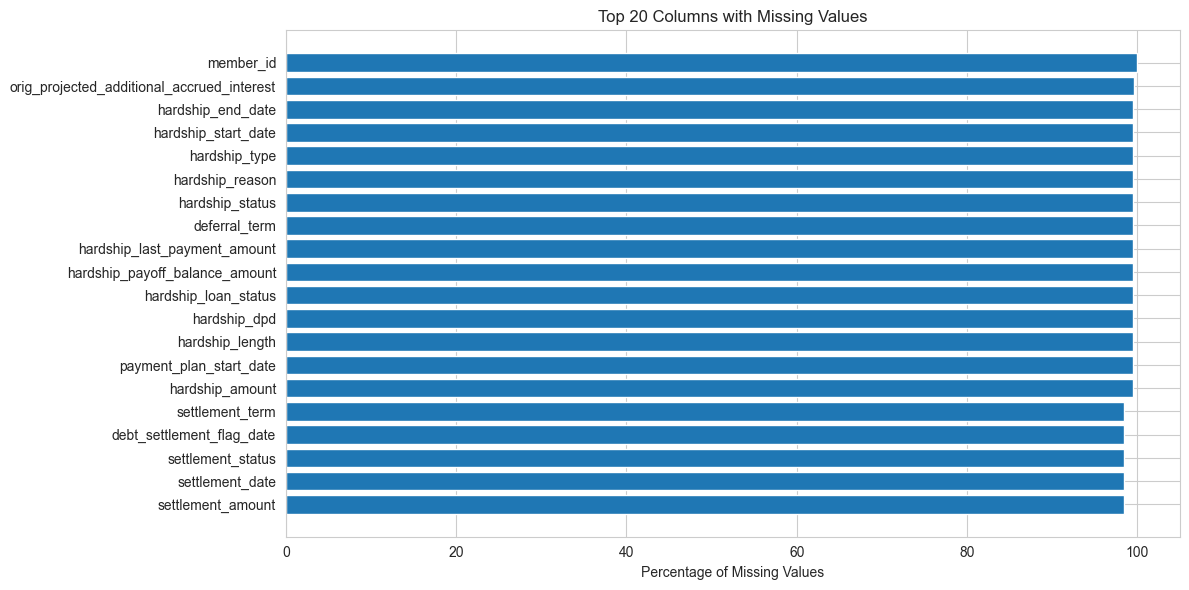

In [8]:
# Analyze missing values

print("-----------MISSING VALUES ANALYSIS-----------")


missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Percentage': missing_pct.values
}).sort_values(by='Missing_Count', ascending=False)

# Display only columns with missing values
missing_with_nulls = missing_df[missing_df['Missing_Count'] > 0]
print(f"\nColumns with missing values: {len(missing_with_nulls)}\n")
print(missing_with_nulls.to_string(index=False))

# Visualize missing values
if len(missing_with_nulls) > 0:
    plt.figure(figsize=(12, 6))
    top_missing = missing_with_nulls.head(20)
    plt.barh(top_missing['Column'], top_missing['Percentage'])
    plt.xlabel('Percentage of Missing Values')
    plt.title('Top 20 Columns with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [9]:
# Categorize columns by missing value severity
print("="*80)
print("MISSING VALUE SEVERITY CATEGORIZATION")
print("="*80)

missing_with_nulls = missing_df[missing_df['Missing_Count'] > 0].copy()

# Categorize by severity
severe_missing = missing_with_nulls[missing_with_nulls['Percentage'] >= 90]
high_missing = missing_with_nulls[(missing_with_nulls['Percentage'] >= 50) & (missing_with_nulls['Percentage'] < 90)]
moderate_missing = missing_with_nulls[(missing_with_nulls['Percentage'] >= 20) & (missing_with_nulls['Percentage'] < 50)]
low_missing = missing_with_nulls[missing_with_nulls['Percentage'] < 20]

print(f"\n📊 Missing Value Categories:")
print(f"   Severe (≥90% missing):    {len(severe_missing)} columns")
print(f"   High (50-90% missing):    {len(high_missing)} columns")
print(f"   Moderate (20-50% missing): {len(moderate_missing)} columns")
print(f"   Low (<20% missing):       {len(low_missing)} columns")

print(f"\n🔴 SEVERE Missing Values (≥90% - Consider dropping):")
print(severe_missing[['Column', 'Percentage']].to_string(index=False))

MISSING VALUE SEVERITY CATEGORIZATION

📊 Missing Value Categories:
   Severe (≥90% missing):    38 columns
   High (50-90% missing):    6 columns
   Moderate (20-50% missing): 14 columns
   Low (<20% missing):       92 columns

🔴 SEVERE Missing Values (≥90% - Consider dropping):
                                    Column  Percentage
                                 member_id  100.000000
orig_projected_additional_accrued_interest   99.632415
                         hardship_end_date   99.526916
                       hardship_start_date   99.526916
                             hardship_type   99.526916
                           hardship_reason   99.526916
                           hardship_status   99.526916
                             deferral_term   99.526916
              hardship_last_payment_amount   99.526916
            hardship_payoff_balance_amount   99.526916
                      hardship_loan_status   99.526916
                              hardship_dpd   99.526916
     

In [10]:
# Strategy: Drop columns with >90% missing values
# These columns have insufficient data for meaningful analysis

threshold = 90  # Drop columns with more than 90% missing

columns_to_drop = severe_missing['Column'].tolist()

print("="*80)
print("DROPPING HIGH MISSING VALUE COLUMNS")
print("="*80)
print(f"\nThreshold: >{threshold}% missing values")
print(f"Columns to drop: {len(columns_to_drop)}\n")

# Show first 20 columns being dropped
print("Columns being dropped (first 20):")
for i, col in enumerate(columns_to_drop[:20], 1):
    pct = severe_missing[severe_missing['Column'] == col]['Percentage'].values[0]
    print(f"  {i:2d}. {col:<50s} ({pct:.2f}% missing)")

if len(columns_to_drop) > 20:
    print(f"  ... and {len(columns_to_drop) - 20} more columns")

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\n✓ Dropped {len(columns_to_drop)} columns")
print(f"  Original shape: {df.shape}")
print(f"  New shape:      {df_cleaned.shape}")
print(f"  Columns removed: {df.shape[1] - df_cleaned.shape[1]}")


DROPPING HIGH MISSING VALUE COLUMNS

Threshold: >90% missing values
Columns to drop: 38

Columns being dropped (first 20):
   1. member_id                                          (100.00% missing)
   2. orig_projected_additional_accrued_interest         (99.63% missing)
   3. hardship_end_date                                  (99.53% missing)
   4. hardship_start_date                                (99.53% missing)
   5. hardship_type                                      (99.53% missing)
   6. hardship_reason                                    (99.53% missing)
   7. hardship_status                                    (99.53% missing)
   8. deferral_term                                      (99.53% missing)
   9. hardship_last_payment_amount                       (99.53% missing)
  10. hardship_payoff_balance_amount                     (99.53% missing)
  11. hardship_loan_status                               (99.53% missing)
  12. hardship_dpd                                       (99.5

REMAINING MISSING VALUES AFTER CLEANUP

Columns with missing values: 112
Total missing cells: 4935734

Remaining columns with missing values:
                        Column  Missing_Count  Percentage
        mths_since_last_record         380362   84.124829
      mths_since_recent_bc_dlq         348084   76.985889
   mths_since_last_major_derog         335831   74.275888
mths_since_recent_revol_delinq         303831   67.198434
                  next_pymnt_d         268634   59.413898
        mths_since_last_delinq         231586   51.219976
                       il_util         213118   47.135401
            mths_since_rcnt_il         181252   40.087583
                      all_util         172646   38.184191
                   open_acc_6m         172605   38.175123
                   open_act_il         172605   38.175123
                   open_il_12m         172605   38.175123
                  total_bal_il         172605   38.175123
                   open_il_24m         172605 

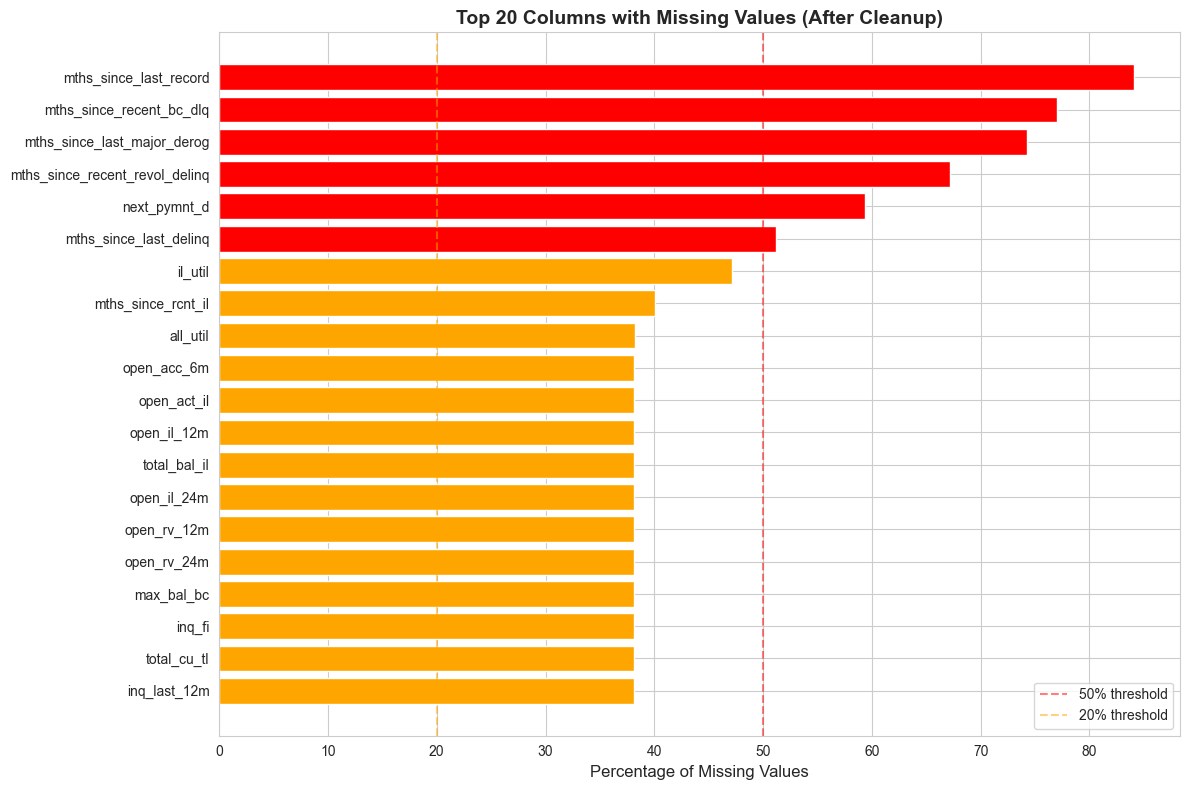


✓ Updated main dataframe to cleaned version


In [11]:
# Analyze remaining missing values after dropping high-missing columns
print("="*80)
print("REMAINING MISSING VALUES AFTER CLEANUP")
print("="*80)

missing_remaining = df_cleaned.isnull().sum()
missing_pct_remaining = (missing_remaining / len(df_cleaned)) * 100

missing_df_remaining = pd.DataFrame({
    'Column': missing_remaining.index,
    'Missing_Count': missing_remaining.values,
    'Percentage': missing_pct_remaining.values
}).sort_values(by='Missing_Count', ascending=False)

missing_with_nulls_remaining = missing_df_remaining[missing_df_remaining['Missing_Count'] > 0]

print(f"\nColumns with missing values: {len(missing_with_nulls_remaining)}")
print(f"Total missing cells: {missing_remaining.sum()}")

if len(missing_with_nulls_remaining) > 0:
    print("\nRemaining columns with missing values:")
    print(missing_with_nulls_remaining.to_string(index=False))
    
    # Visualize
    if len(missing_with_nulls_remaining) > 0:
        plt.figure(figsize=(12, 8))
        top_20 = missing_with_nulls_remaining.head(20)
        
        colors = ['red' if x >= 50 else 'orange' if x >= 20 else 'yellow' if x >= 10 else 'green' 
                  for x in top_20['Percentage']]
        
        plt.barh(top_20['Column'], top_20['Percentage'], color=colors)
        plt.xlabel('Percentage of Missing Values', fontsize=12)
        plt.title('Top 20 Columns with Missing Values (After Cleanup)', fontsize=14, fontweight='bold')
        plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
        plt.axvline(x=20, color='orange', linestyle='--', alpha=0.5, label='20% threshold')
        plt.legend()
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
else:
    print("\n✓ No missing values remaining!")

# Update df to use cleaned version
df = df_cleaned.copy()
print(f"\n✓ Updated main dataframe to cleaned version")

In [12]:
# Strategy for remaining missing values
print("="*80)
print("MISSING VALUE HANDLING STRATEGY")
print("="*80)

print("""
Strategy for remaining missing values (<90% missing):

1. CATEGORICAL FEATURES:
   - Create 'Unknown' or 'Missing' category
   - Missing may be informative (e.g., no secondary income = 'None')

2. NUMERICAL FEATURES:
   - <20% missing: Impute with median
   - 20-50% missing: Consider creating binary flag + imputation
   - >50% missing: Drop or use cautiously

3. DATE FEATURES:
   - Missing dates may indicate "event did not occur"
   - Consider converting to binary indicator

4. TEXT FEATURES:
   - If mostly missing, consider dropping
   - If meaningful, fill with 'Not Provided'
""")

# Identify columns by type for targeted imputation
remaining_numerical = df.select_dtypes(include=[np.number]).columns.tolist()
remaining_categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check which have missing values
num_with_missing = [col for col in remaining_numerical if df[col].isnull().sum() > 0]
cat_with_missing = [col for col in remaining_categorical if df[col].isnull().sum() > 0]

print(f"\nColumns requiring imputation:")
print(f"  Numerical:   {len(num_with_missing)} columns")
print(f"  Categorical: {len(cat_with_missing)} columns")

if num_with_missing:
    print(f"\n  Numerical columns with missing values:")
    for col in num_with_missing[:10]:
        pct = (df[col].isnull().sum() / len(df)) * 100
        print(f"    - {col}: {pct:.2f}%")
    if len(num_with_missing) > 10:
        print(f"    ... and {len(num_with_missing) - 10} more")

if cat_with_missing:
    print(f"\n  Categorical columns with missing values:")
    for col in cat_with_missing[:10]:
        pct = (df[col].isnull().sum() / len(df)) * 100
        print(f"    - {col}: {pct:.2f}%")
    if len(cat_with_missing) > 10:
        print(f"    ... and {len(cat_with_missing) - 10} more")

MISSING VALUE HANDLING STRATEGY

Strategy for remaining missing values (<90% missing):

1. CATEGORICAL FEATURES:
   - Create 'Unknown' or 'Missing' category
   - Missing may be informative (e.g., no secondary income = 'None')

2. NUMERICAL FEATURES:
   - <20% missing: Impute with median
   - 20-50% missing: Consider creating binary flag + imputation
   - >50% missing: Drop or use cautiously

3. DATE FEATURES:
   - Missing dates may indicate "event did not occur"
   - Consider converting to binary indicator

4. TEXT FEATURES:
   - If mostly missing, consider dropping
   - If meaningful, fill with 'Not Provided'


Columns requiring imputation:
  Numerical:   88 columns
  Categorical: 24 columns

  Numerical columns with missing values:
    - loan_amnt: 0.00%
    - funded_amnt: 0.00%
    - funded_amnt_inv: 0.00%
    - int_rate: 0.00%
    - installment: 0.00%
    - annual_inc: 0.00%
    - dti: 0.08%
    - delinq_2yrs: 0.00%
    - fico_range_low: 0.00%
    - fico_range_high: 0.00%
    ... a

TARGET VARIABLE: loan_status

Value Counts:
loan_status
Fully Paid                                             214640
Current                                                176017
Charged Off                                             53988
Late (31-120 days)                                       4379
In Grace Period                                          1713
Late (16-30 days)                                         859
Does not meet the credit policy. Status:Fully Paid        373
Does not meet the credit policy. Status:Charged Off       158
Default                                                     7
Name: count, dtype: int64

Percentage Distribution:
loan_status
Fully Paid                                             47.47
Current                                                38.93
Charged Off                                            11.94
Late (31-120 days)                                      0.97
In Grace Period                                         0.38
Late (16-30 days)

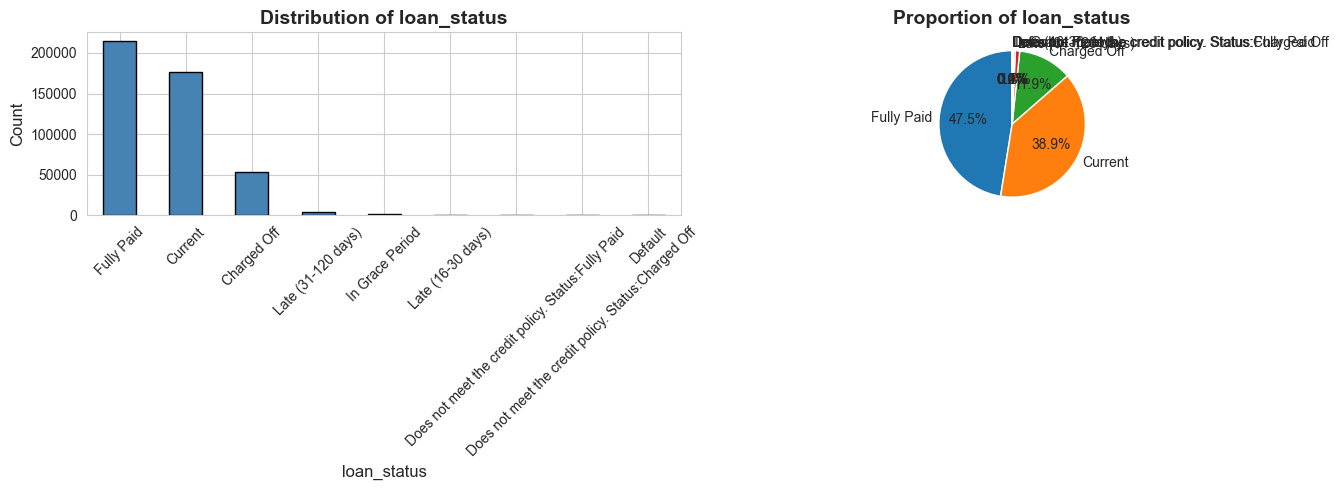

In [13]:
# Analyze target variable
target_col = 'loan_status'  # CHANGE THIS IF NEEDED

if target_col in df.columns:
    print("="*80)
    print(f"TARGET VARIABLE: {target_col}")
    print("="*80)
    
    print("\nValue Counts:")
    print(df[target_col].value_counts())
    
    print("\nPercentage Distribution:")
    print((df[target_col].value_counts(normalize=True) * 100).round(2))
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    df[target_col].value_counts().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_title(f'Distribution of {target_col}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel(target_col, fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proportion of {target_col}', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Warning: Column '{target_col}' not found in dataset")
    print(f"Available columns: {df.columns.tolist()}")

In [14]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("="*80)
print("NUMERICAL FEATURES OVERVIEW")
print("="*80)
print(f"\nTotal numerical columns: {len(numerical_cols)}")
print(f"\nNumerical columns: {numerical_cols}")

NUMERICAL FEATURES OVERVIEW

Total numerical columns: 88

Numerical columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_u

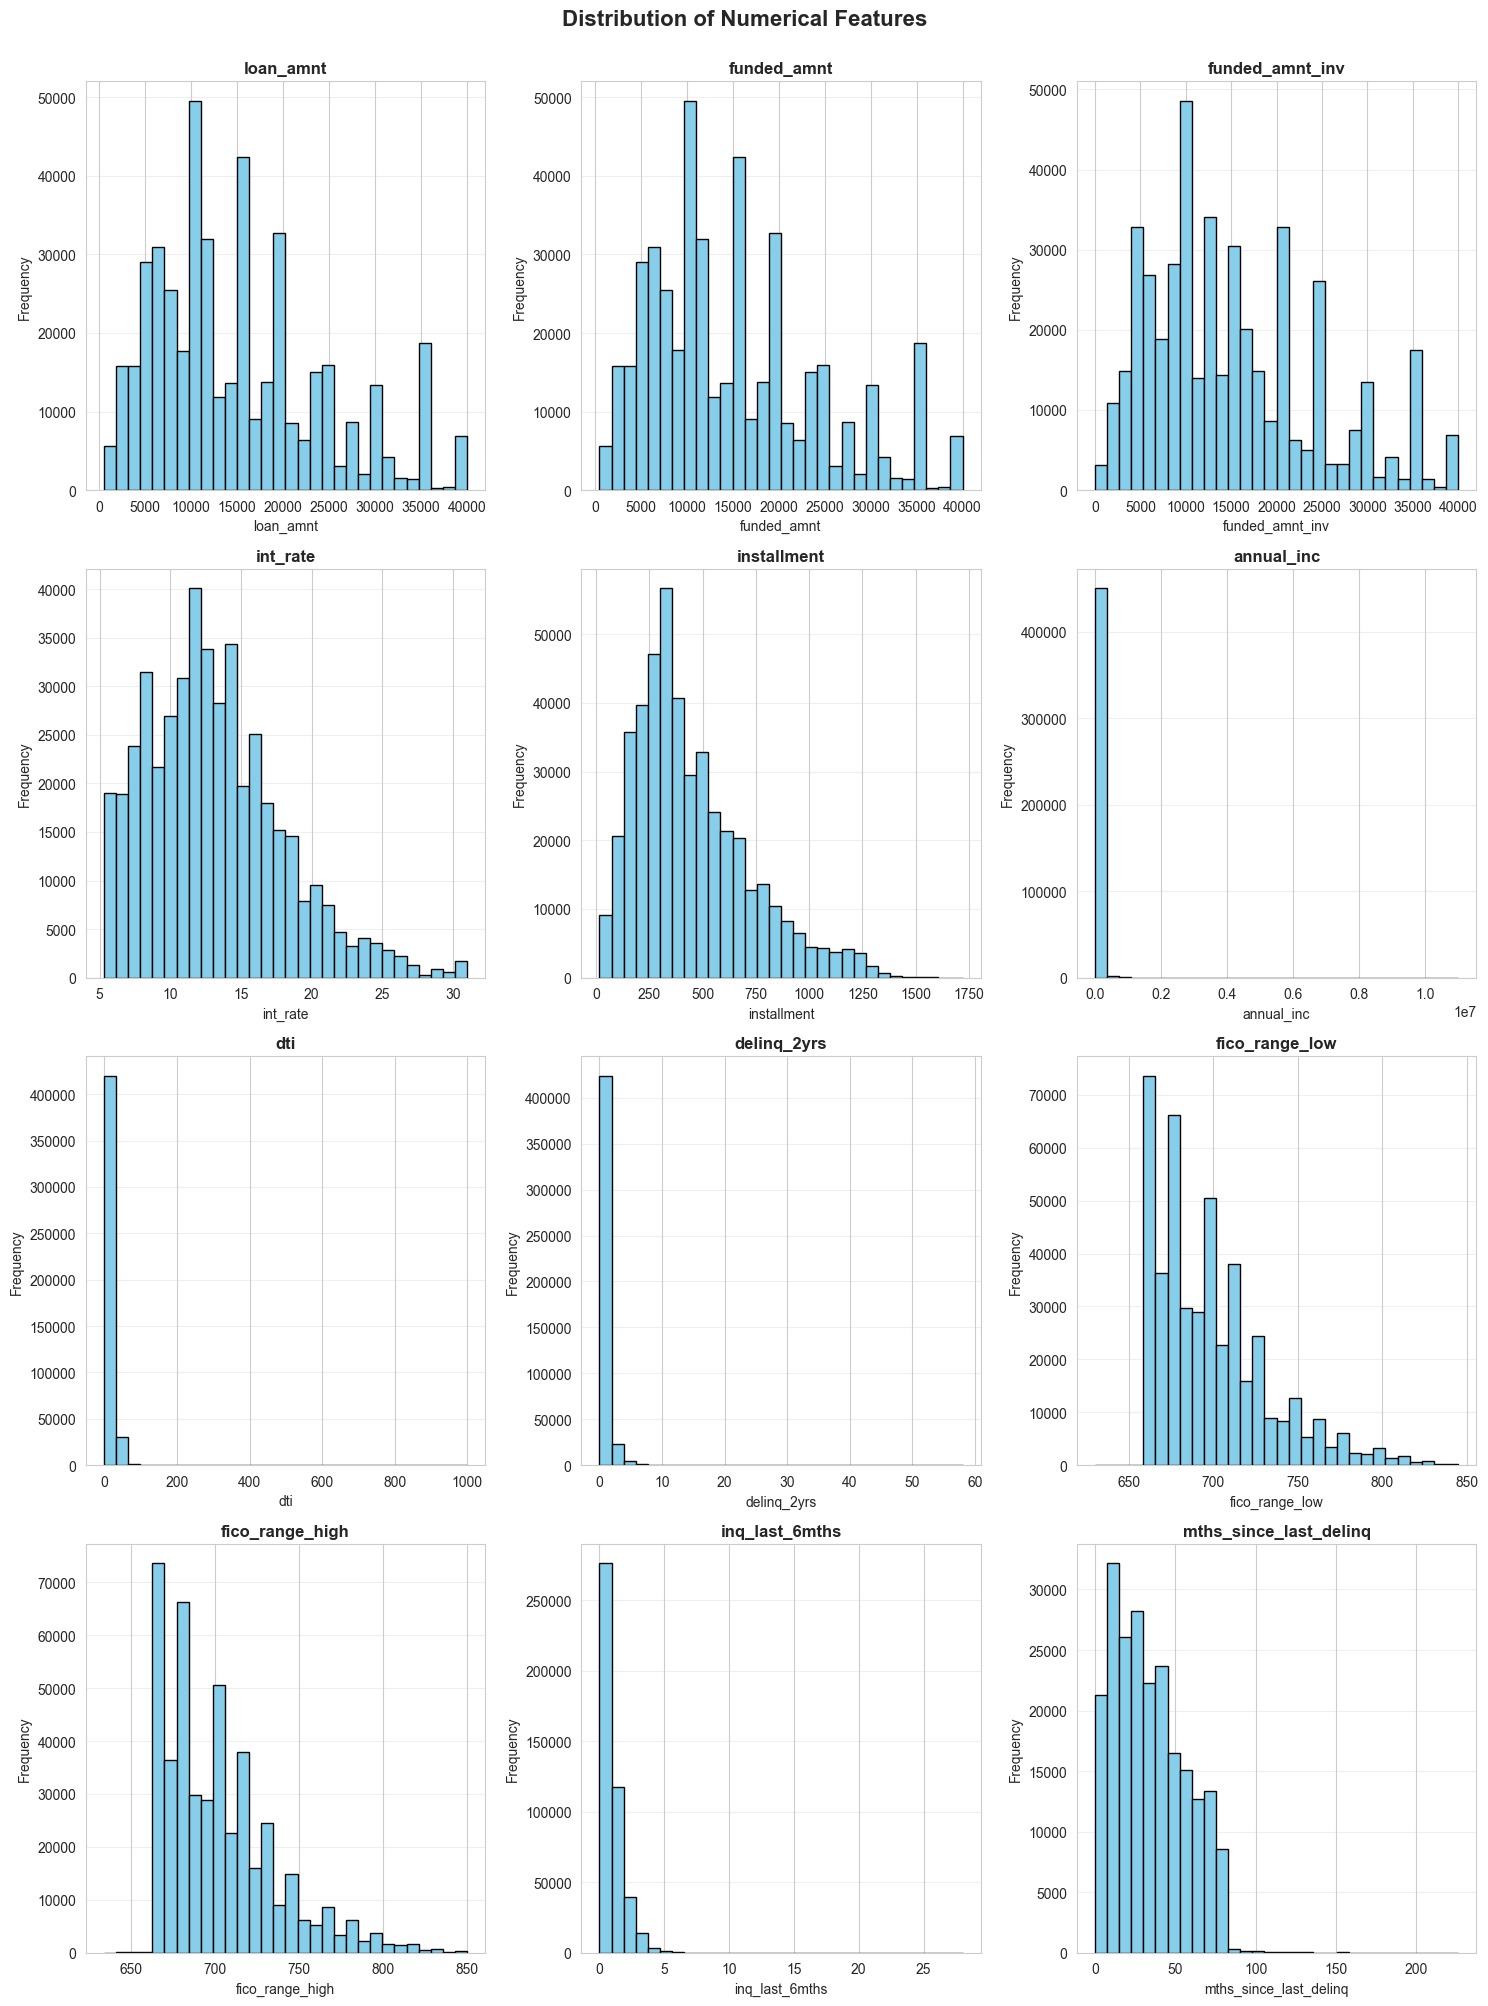

In [15]:
# Plot distributions of numerical features
key_features = numerical_cols[:12]  # First 12 numerical features

if len(key_features) > 0:
    n_cols = 3
    n_rows = (len(key_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(key_features) > 1 else [axes]
    
    for idx, col in enumerate(key_features):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', color='skyblue')
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(key_features), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.001)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found!")

CORRELATION ANALYSIS


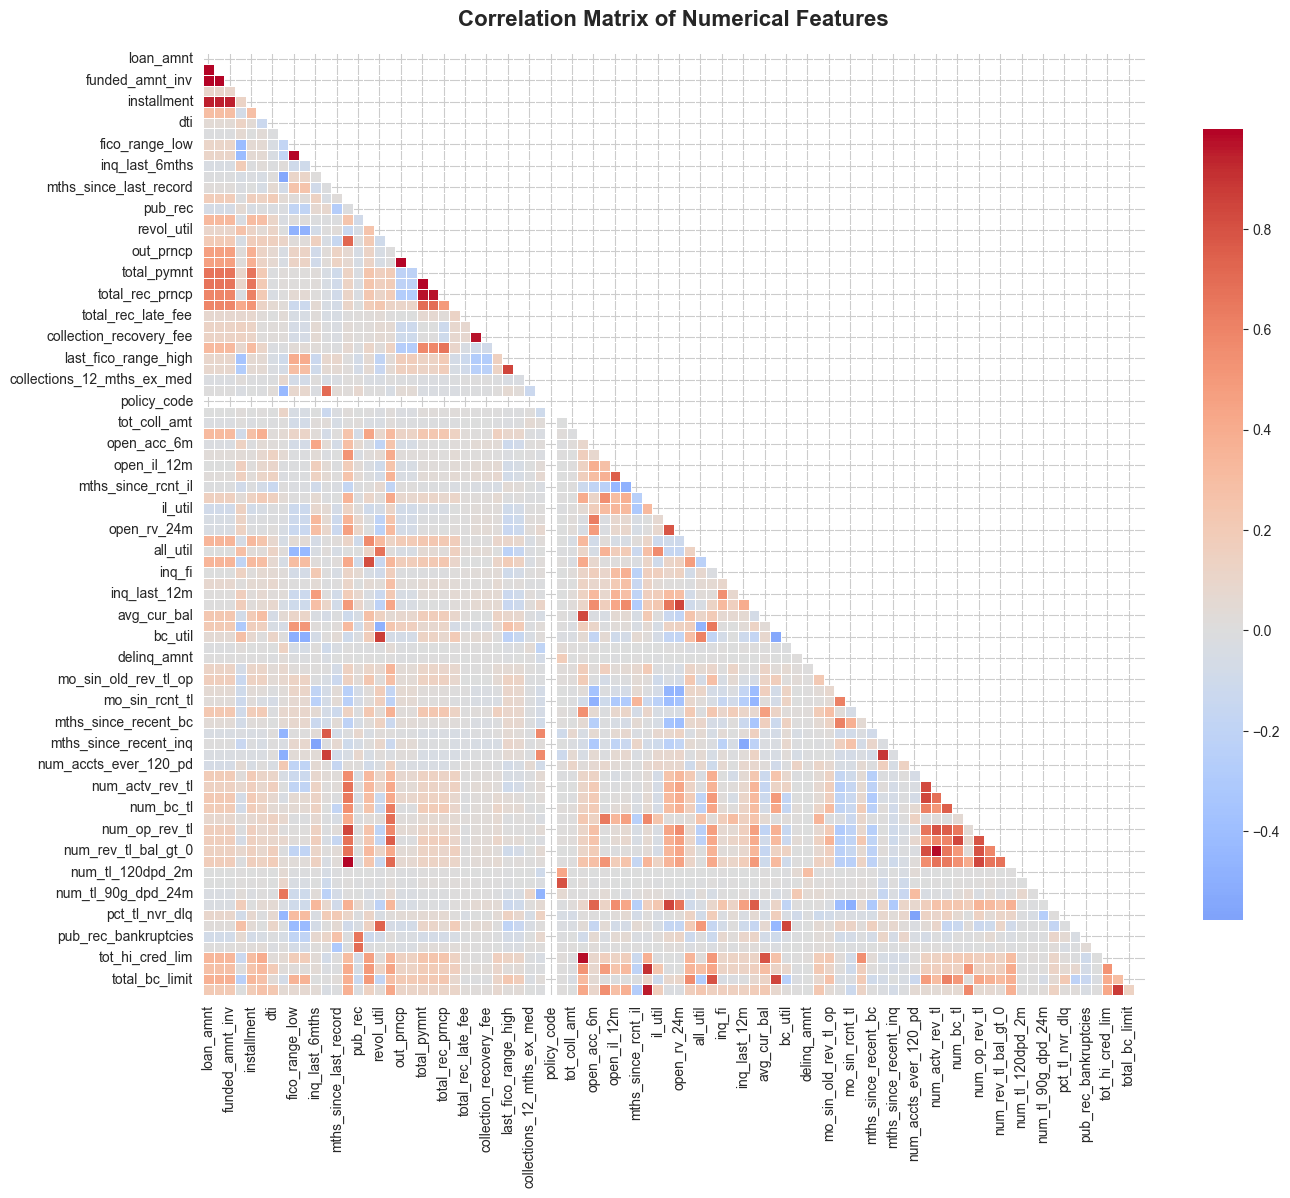


Highly Correlated Feature Pairs (|correlation| > 0.7):
               Feature 1                      Feature 2  Correlation
          fico_range_low                fico_range_high     1.000000
               out_prncp                  out_prncp_inv     0.999999
               loan_amnt                    funded_amnt     0.999762
             funded_amnt                funded_amnt_inv     0.999383
             total_pymnt                total_pymnt_inv     0.999374
               loan_amnt                funded_amnt_inv     0.999090
                open_acc                       num_sats     0.998977
         num_actv_rev_tl            num_rev_tl_bal_gt_0     0.983883
             tot_cur_bal                tot_hi_cred_lim     0.980352
              recoveries        collection_recovery_fee     0.971727
             total_pymnt                total_rec_prncp     0.966229
         total_pymnt_inv                total_rec_prncp     0.965581
            total_bal_il     total_il_high_cred

In [16]:
# Correlation matrix for numerical features
if len(numerical_cols) > 1:
    print("="*80)
    print("CORRELATION ANALYSIS")
    print("="*80)
    
    # Calculate correlation
    corr_matrix = df[numerical_cols].corr()
    
    # Visualize correlation matrix
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', 
                center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Show highly correlated pairs
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr:
        high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', ascending=False, key=abs)
        print(high_corr_df.to_string(index=False))
    else:
        print("No highly correlated pairs found.")

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("="*80)
print("CATEGORICAL FEATURES OVERVIEW")
print("="*80)
print(f"\nTotal categorical columns: {len(categorical_cols)}")
print(f"\nCategorical columns: {categorical_cols}")

CATEGORICAL FEATURES OVERVIEW

Total categorical columns: 25

Categorical columns: ['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [18]:
# Analyze categorical features
print("="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

for col in categorical_cols[:10]:  # Analyze first 10 categorical columns
    print(f"\n{'-'*80}")
    print(f"Column: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nTop 10 value counts:")
    print(df[col].value_counts().head(10))

CATEGORICAL FEATURES ANALYSIS

--------------------------------------------------------------------------------
Column: id
Unique values: 452140

Top 10 value counts:
id
39651438     1
17794284     1
6295197      1
42904370     1
73733610     1
77118448     1
54969490     1
137878881    1
128002739    1
131137338    1
Name: count, dtype: int64

--------------------------------------------------------------------------------
Column: term
Unique values: 2

Top 10 value counts:
term
36 months    322169
60 months    129965
Name: count, dtype: int64

--------------------------------------------------------------------------------
Column: grade
Unique values: 7

Top 10 value counts:
grade
B    132737
C    129760
A     86801
D     64948
E     27214
F      8195
G      2479
Name: count, dtype: int64

--------------------------------------------------------------------------------
Column: sub_grade
Unique values: 35

Top 10 value counts:
sub_grade
C1    29191
B5    28356
B4    27681
C2    26378


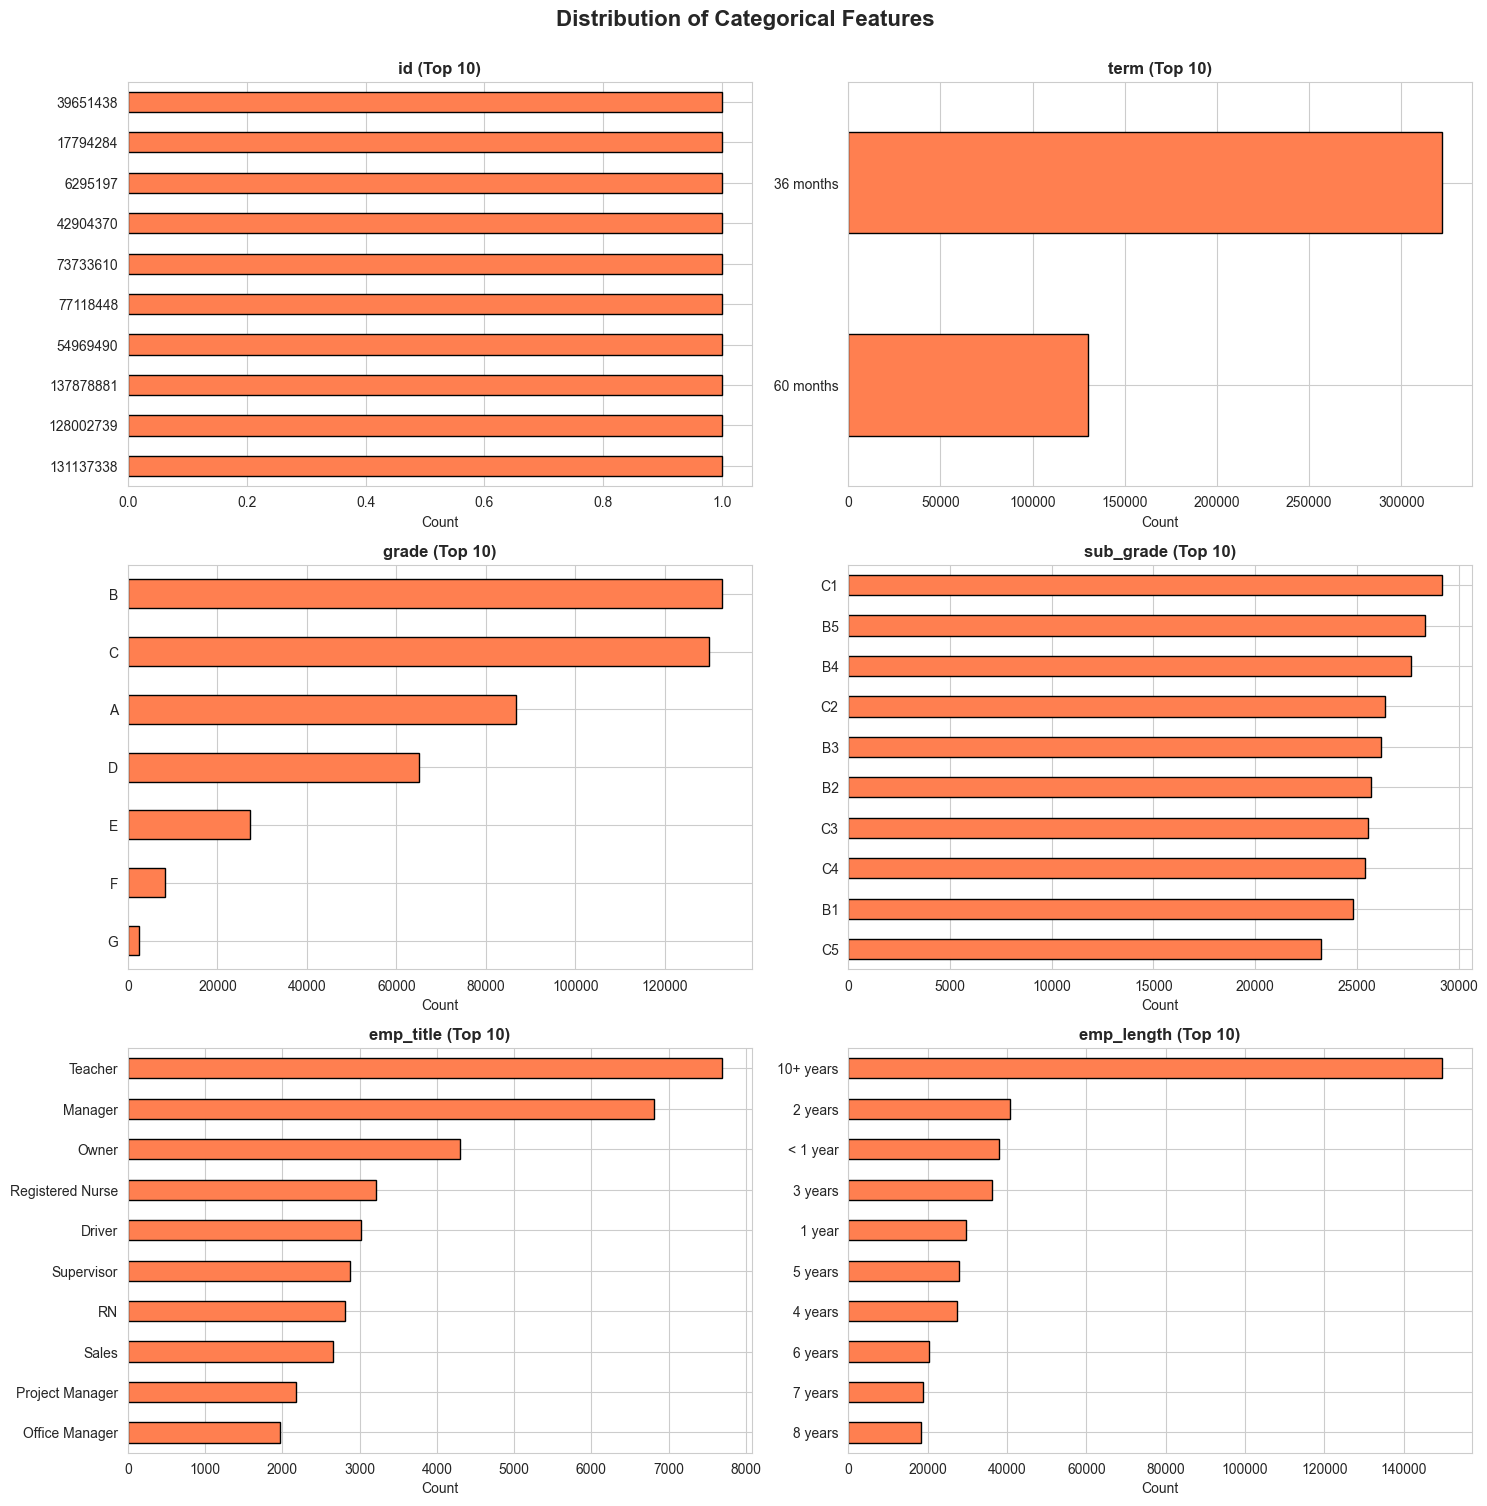

In [19]:
# Visualize categorical features
cat_to_plot = categorical_cols[:6]  # First 6 categorical features

if len(cat_to_plot) > 0:
    n_cols = 2
    n_rows = (len(cat_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(cat_to_plot) > 1 else [axes]
    
    for idx, col in enumerate(cat_to_plot):
        top_categories = df[col].value_counts().head(10)
        top_categories.plot(kind='barh', ax=axes[idx], color='coral', edgecolor='black')
        axes[idx].set_title(f'{col} (Top 10)', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Count', fontsize=10)
        axes[idx].set_ylabel('')
        axes[idx].invert_yaxis()
    
    # Hide empty subplots
    for idx in range(len(cat_to_plot), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=1.001)
    plt.tight_layout()
    plt.show()

In [20]:
# SMARTER FEATURE SELECTION - Exclude columns with too much missing data

print("="*80)
print("INTELLIGENT FEATURE SELECTION")
print("="*80)

# First, get columns with acceptable missing value rates (<20%)
acceptable_missing = missing_df_remaining[missing_df_remaining['Percentage'] < 20]['Column'].tolist()

print(f"\nColumns with <20% missing values: {len(acceptable_missing)}")

# Common important loan features (adjust based on your dataset)
important_features = [
    # Borrower characteristics
    'annual_inc', 'annual_income', 'emp_length', 'employment_length',
    'home_ownership', 'verification_status', 'dti', 'debt_to_income',
    
    # Loan characteristics  
    'loan_amnt', 'loan_amount', 'funded_amnt', 'funded_amnt_inv',
    'int_rate', 'interest_rate', 'installment', 'term', 'grade', 'sub_grade', 'purpose',
    
    # Credit history
    'fico_range_low', 'fico_range_high', 'revol_bal', 'revol_util',
    'total_acc', 'open_acc', 'pub_rec', 'delinq_2yrs', 'inq_last_6mths',
    
    # Account info
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'last_pymnt_amnt', 'last_pymnt_d', 'addr_state', 'zip_code',
    'earliest_cr_line', 'issue_d', 'loan_status'
]

# Find features that exist in dataset AND have acceptable missing rates
available_features = [col for col in important_features 
                     if col in df.columns and col in acceptable_missing]

# Remove target if present
if target_col in available_features:
    available_features.remove(target_col)

print(f"\nSelected {len(available_features)} features (exists + <20% missing):\n")
for i, feat in enumerate(available_features, 1):
    missing_pct = (df[feat].isnull().sum() / len(df)) * 100
    print(f"{i:2d}. {feat:<35s} ({missing_pct:.2f}% missing)")

# Add missing value indicator columns if they were created
indicator_cols = [col for col in df.columns if col.endswith('_missing')]
if indicator_cols:
    print(f"\n✓ Including {len(indicator_cols)} missing value indicators")
    available_features.extend(indicator_cols)

print(f"\n\nFinal feature count: {len(available_features)}")

INTELLIGENT FEATURE SELECTION

Columns with <20% missing values: 93

Selected 33 features (exists + <20% missing):

 1. annual_inc                          (0.00% missing)
 2. emp_length                          (6.47% missing)
 3. home_ownership                      (0.00% missing)
 4. verification_status                 (0.00% missing)
 5. dti                                 (0.08% missing)
 6. loan_amnt                           (0.00% missing)
 7. funded_amnt                         (0.00% missing)
 8. funded_amnt_inv                     (0.00% missing)
 9. int_rate                            (0.00% missing)
10. installment                         (0.00% missing)
11. term                                (0.00% missing)
12. grade                               (0.00% missing)
13. sub_grade                           (0.00% missing)
14. purpose                             (0.00% missing)
15. fico_range_low                      (0.00% missing)
16. fico_range_high                     (0.0

In [21]:
# Create subset with selected features and target
if target_col in df.columns:
    selected_cols = available_features + [target_col]
    df_subset = df[selected_cols].copy()
    print(f"Created subset with {len(available_features)} features + 1 target column")
else:
    df_subset = df[available_features].copy()
    print(f"Warning: Target column '{target_col}' not found")
    print(f"Created subset with {len(available_features)} features only")

print(f"\nSubset shape: {df_subset.shape}")
df_subset.head()

Created subset with 33 features + 1 target column

Subset shape: (452140, 34)


,annual_inc,emp_length,home_ownership,verification_status,dti,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,...,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_pymnt_d,addr_state,zip_code,earliest_cr_line,issue_d,loan_status
392949,120000.0,10+ years,MORTGAGE,Verified,24.05,32000.0,32000.0,32000.0,10.49,687.65,...,33676.20,24818.09,8858.11,687.65,Mar-2019,CA,919xx,Oct-1981,Feb-2015,Current
1273506,21900.0,NaN,RENT,Verified,10.03,9600.0,9600.0,9600.0,12.99,323.42,...,11643.97,9600.00,2043.97,0.85,Jun-2017,FL,331xx,Apr-2001,May-2014,Fully Paid
324024,83000.0,4 years,MORTGAGE,Not Verified,19.53,4000.0,4000.0,4000.0,6.68,122.93,...,4368.84,4000.00,368.84,1667.35,Mar-2017,FL,333xx,Sep-2003,Apr-2015,Fully Paid
2066630,52000.0,10+ years,RENT,Not Verified,9.16,6025.0,6025.0,6025.0,10.91,197.00,...,6542.49,6025.00,517.49,4762.18,Oct-2018,MA,021xx,Jun-2005,Dec-2017,Fully Paid
477199,65000.0,10+ years,OWN,Verified,36.26,25000.0,25000.0,25000.0,26.30,752.96,...,9697.16,3045.86,6651.30,752.96,Mar-2019,CA,926xx,Jul-1999,Feb-2018,Current


In [22]:
# Separate numerical and categorical features
numerical_features = df_subset.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_subset.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target from feature lists if present
if target_col in numerical_features:
    numerical_features.remove(target_col)
if target_col in categorical_features:
    categorical_features.remove(target_col)

print("="*80)
print("FEATURE TYPE SEPARATION")
print("="*80)
print(f"\nNumerical features ({len(numerical_features)}):")
for feat in numerical_features:
    print(f"  - {feat}")

print(f"\nCategorical features ({len(categorical_features)}):")
for feat in categorical_features:
    print(f"  - {feat}")

FEATURE TYPE SEPARATION

Numerical features (21):
  - annual_inc
  - dti
  - loan_amnt
  - funded_amnt
  - funded_amnt_inv
  - int_rate
  - installment
  - fico_range_low
  - fico_range_high
  - revol_bal
  - revol_util
  - total_acc
  - open_acc
  - pub_rec
  - delinq_2yrs
  - inq_last_6mths
  - total_pymnt
  - total_pymnt_inv
  - total_rec_prncp
  - total_rec_int
  - last_pymnt_amnt

Categorical features (12):
  - emp_length
  - home_ownership
  - verification_status
  - term
  - grade
  - sub_grade
  - purpose
  - last_pymnt_d
  - addr_state
  - zip_code
  - earliest_cr_line
  - issue_d


In [23]:
# Check missing values in selected features
print("="*80)
print("MISSING VALUES IN SELECTED FEATURES")
print("="*80)

missing_subset = df_subset.isnull().sum()
missing_pct_subset = (missing_subset / len(df_subset)) * 100

missing_df_subset = pd.DataFrame({
    'Feature': missing_subset.index,
    'Missing_Count': missing_subset.values,
    'Percentage': missing_pct_subset.values
}).sort_values(by='Missing_Count', ascending=False)

missing_with_nulls_subset = missing_df_subset[missing_df_subset['Missing_Count'] > 0]

if len(missing_with_nulls_subset) > 0:
    print(f"\nFeatures with missing values: {len(missing_with_nulls_subset)}\n")
    print(missing_with_nulls_subset.to_string(index=False))
else:
    print("\n✓ No missing values found in selected features!")

MISSING VALUES IN SELECTED FEATURES

Features with missing values: 34

            Feature  Missing_Count  Percentage
         emp_length          29268    6.473216
       last_pymnt_d            501    0.110806
                dti            353    0.078073
         revol_util            336    0.074313
   earliest_cr_line              9    0.001991
     inq_last_6mths              9    0.001991
        delinq_2yrs              9    0.001991
            pub_rec              9    0.001991
           open_acc              9    0.001991
          total_acc              9    0.001991
         annual_inc              7    0.001548
              grade              6    0.001327
        total_pymnt              6    0.001327
            issue_d              6    0.001327
     home_ownership              6    0.001327
           zip_code              6    0.001327
         addr_state              6    0.001327
verification_status              6    0.001327
    last_pymnt_amnt              6  

In [24]:
# Handle missing values in numerical features
print("="*80)
print("HANDLING MISSING VALUES - NUMERICAL FEATURES")
print("="*80)
print("\nStrategy: Impute with MEDIAN (robust to outliers)\n")

df_clean = df_subset.copy()

num_imputer = SimpleImputer(strategy='median')

for col in numerical_features:
    if df_clean[col].isnull().sum() > 0:
        missing_count = df_clean[col].isnull().sum()
        median_value = df_clean[col].median()
        print(f"  {col}: {missing_count} missing values → Imputing with median = {median_value:.2f}")
        df_clean[col] = num_imputer.fit_transform(df_clean[[col]])
    else:
        print(f"  {col}: No missing values ✓")

print(f"\n✓ Numerical features processed")

HANDLING MISSING VALUES - NUMERICAL FEATURES

Strategy: Impute with MEDIAN (robust to outliers)

  annual_inc: 7 missing values → Imputing with median = 65000.00
  dti: 353 missing values → Imputing with median = 17.89
  loan_amnt: 6 missing values → Imputing with median = 12875.00
  funded_amnt: 6 missing values → Imputing with median = 12825.00
  funded_amnt_inv: 6 missing values → Imputing with median = 12800.00
  int_rate: 6 missing values → Imputing with median = 12.62
  installment: 6 missing values → Imputing with median = 377.41
  fico_range_low: 6 missing values → Imputing with median = 690.00
  fico_range_high: 6 missing values → Imputing with median = 694.00
  revol_bal: 6 missing values → Imputing with median = 11347.00
  revol_util: 336 missing values → Imputing with median = 50.30
  total_acc: 9 missing values → Imputing with median = 22.00
  open_acc: 9 missing values → Imputing with median = 11.00
  pub_rec: 9 missing values → Imputing with median = 0.00
  delinq_2yrs: 

In [25]:
# Handle missing values in categorical features
print("="*80)
print("HANDLING MISSING VALUES - CATEGORICAL FEATURES")
print("="*80)
print("\nStrategy: Impute with MODE (most frequent value)\n")

cat_imputer = SimpleImputer(strategy='most_frequent')

for col in categorical_features:
    if df_clean[col].isnull().sum() > 0:
        missing_count = df_clean[col].isnull().sum()
        mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
        print(f"  {col}: {missing_count} missing values → Imputing with mode = '{mode_value}'")
        df_clean[col] = cat_imputer.fit_transform(df_clean[[col]]).ravel()
    else:
        print(f"  {col}: No missing values ✓")

print(f"\n✓ Categorical features processed")

# Verify no missing values remain
print(f"\nRemaining missing values in dataset: {df_clean.isnull().sum().sum()}")

HANDLING MISSING VALUES - CATEGORICAL FEATURES

Strategy: Impute with MODE (most frequent value)

  emp_length: 29268 missing values → Imputing with mode = '10+ years'
  home_ownership: 6 missing values → Imputing with mode = 'MORTGAGE'
  verification_status: 6 missing values → Imputing with mode = 'Source Verified'
  term: 6 missing values → Imputing with mode = ' 36 months'
  grade: 6 missing values → Imputing with mode = 'B'
  sub_grade: 6 missing values → Imputing with mode = 'C1'
  purpose: 6 missing values → Imputing with mode = 'debt_consolidation'
  last_pymnt_d: 501 missing values → Imputing with mode = 'Mar-2019'
  addr_state: 6 missing values → Imputing with mode = 'CA'
  zip_code: 6 missing values → Imputing with mode = '750xx'
  earliest_cr_line: 9 missing values → Imputing with mode = 'Sep-2003'
  issue_d: 6 missing values → Imputing with mode = 'Mar-2016'

✓ Categorical features processed

Remaining missing values in dataset: 6


In [26]:
# Encode categorical variables using Label Encoding
# IMPORTANT: Exclude target variable from encoding
print("="*80)
print("ENCODING CATEGORICAL VARIABLES")
print("="*80)
print("\nStrategy: Label Encoding (converts categories to integers)\n")
print("⚠️  NOTE: Target variable 'loan_status' will be handled separately\n")

df_encoded = df_clean.copy()
label_encoders = {}

# Get categorical features excluding target
categorical_features_to_encode = [col for col in categorical_features if col != 'loan_status']

for col in categorical_features_to_encode:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
    
    print(f"{col}:")
    print(f"  Unique values: {len(le.classes_)}")
    if len(le.classes_) <= 10:
        print(f"  Classes: {le.classes_}")
    else:
        print(f"  Classes (first 10): {le.classes_[:10]}...")
    print()

print(f"✓ Encoded {len(categorical_features_to_encode)} categorical features")
print(f"✓ Target variable 'loan_status' kept as original text for now")

ENCODING CATEGORICAL VARIABLES

Strategy: Label Encoding (converts categories to integers)

⚠️  NOTE: Target variable 'loan_status' will be handled separately

emp_length:
  Unique values: 11
  Classes (first 10): ['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years']...

home_ownership:
  Unique values: 6
  Classes: ['ANY' 'MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']

verification_status:
  Unique values: 3
  Classes: ['Not Verified' 'Source Verified' 'Verified']

term:
  Unique values: 2
  Classes: [' 36 months' ' 60 months']

grade:
  Unique values: 7
  Classes: ['A' 'B' 'C' 'D' 'E' 'F' 'G']

sub_grade:
  Unique values: 35
  Classes (first 10): ['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5']...

purpose:
  Unique values: 14
  Classes (first 10): ['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other']...

last_pymnt_d:
  Unique values: 134
  Classes (first 10): ['A

In [27]:
# Verify loan_status is still categorical
print("="*80)
print("TARGET VARIABLE CHECK")
print("="*80)

print(f"\nTarget variable: loan_status")
print(f"Data type: {df_encoded['loan_status'].dtype}")
print(f"Unique values: {df_encoded['loan_status'].nunique()}")
print(f"\nValue counts:")
print(df_encoded['loan_status'].value_counts())

# Confirm it's not been encoded
if df_encoded['loan_status'].dtype == 'object':
    print("\n✓ Target variable is still categorical (correct!)")
else:
    print("\n⚠️  WARNING: Target variable has been converted to numeric!")

TARGET VARIABLE CHECK

Target variable: loan_status
Data type: object
Unique values: 9

Value counts:
loan_status
Fully Paid                                             214640
Current                                                176017
Charged Off                                             53988
Late (31-120 days)                                       4379
In Grace Period                                          1713
Late (16-30 days)                                         859
Does not meet the credit policy. Status:Fully Paid        373
Does not meet the credit policy. Status:Charged Off       158
Default                                                     7
Name: count, dtype: int64

✓ Target variable is still categorical (correct!)


In [28]:
# Scale numerical features using StandardScaler
print("="*80)
print("FEATURE SCALING")
print("="*80)
print("\nStrategy: StandardScaler (mean=0, std=1)\n")

df_scaled = df_encoded.copy()
scaler = StandardScaler()

# Store original statistics
original_stats = df_scaled[numerical_features].describe().loc[['mean', 'std']]
print("Original Statistics (before scaling):")
print(original_stats)

# Apply scaling
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

# Show new statistics
scaled_stats = df_scaled[numerical_features].describe().loc[['mean', 'std']]
print("\nScaled Statistics (after scaling):")
print(scaled_stats)

print(f"\n✓ Scaled {len(numerical_features)} numerical features")

FEATURE SCALING

Strategy: StandardScaler (mean=0, std=1)

Original Statistics (before scaling):
        annual_inc        dti     loan_amnt   funded_amnt  funded_amnt_inv  \
mean  77918.671396  18.845831  15038.604138  15033.628467     15015.745693   
std   75369.158665  14.022903   9181.708894   9179.910828      9183.382763   

       int_rate  installment  fico_range_low  fico_range_high     revol_bal  \
mean  13.089116   445.673721      698.603585       702.603795  16671.240764   
std    4.832195   267.067230       33.023797        33.024732  22547.266712   

      ...  total_acc   open_acc   pub_rec  delinq_2yrs  inq_last_6mths  \
mean  ...  24.170766  11.621953  0.197169     0.307858        0.576777   
std   ...  11.973257   5.639466  0.568175     0.867893        0.885544   

       total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
mean  12050.127913     12031.970791      9478.982844    2424.909560   
std    9870.263032      9865.289465      8298.518905    2668.7614

In [29]:
# Display final preprocessed dataset
print("="*80)
print("FINAL PREPROCESSED DATASET")
print("="*80)

print(f"\nFinal dataset shape: {df_scaled.shape}")
print(f"Features: {df_scaled.shape[1] - (1 if target_col in df_scaled.columns else 0)}")
print(f"Target column: {target_col if target_col in df_scaled.columns else 'Not included'}")

print("\nFirst 5 rows of preprocessed data:")
df_scaled.head()

FINAL PREPROCESSED DATASET

Final dataset shape: (452140, 34)
Features: 33
Target column: loan_status

First 5 rows of preprocessed data:


,annual_inc,emp_length,home_ownership,verification_status,dti,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,...,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_pymnt_d,addr_state,zip_code,earliest_cr_line,issue_d,loan_status
392949,0.558337,1,1,2,0.371120,1.847305,1.848209,1.849457,-0.537875,0.906051,...,2.193981,1.848417,2.410559,-0.454727,89,4,827,606,42,Current
1273506,-0.743258,1,5,2,-0.628674,-0.592331,-0.591905,-0.589734,-0.020512,-0.457764,...,-0.039330,0.014583,-0.142740,-0.569283,76,9,312,42,97,Fully Paid
324024,0.067419,4,1,0,0.048789,-1.202240,-1.201933,-1.199532,-1.326338,-1.208475,...,-0.776778,-0.660237,-0.770422,-0.291316,87,9,314,685,7,Fully Paid
2066630,-0.343890,1,5,0,-0.690716,-0.981692,-0.981343,-0.979024,-0.450958,-0.931129,...,-0.556445,-0.416217,-0.714722,0.224892,122,19,12,400,33,Fully Paid
477199,-0.171405,1,4,2,1.241839,1.084919,1.085673,1.087210,2.733933,1.150596,...,-0.236670,-0.775214,1.583654,-0.443834,89,4,834,335,45,Current


In [30]:
# Final data quality checks
print("="*80)
print("DATA QUALITY CHECKS")
print("="*80)

print("\n1. Missing Values:")
print(f"   Total: {df_scaled.isnull().sum().sum()}")

print("\n2. Duplicate Rows:")
print(f"   Total: {df_scaled.duplicated().sum()}")

print("\n3. Data Types:")
print(df_scaled.dtypes.value_counts())

print("\n4. Summary Statistics:")
print(df_scaled.describe())

print("\n✓ All preprocessing steps completed successfully!")

DATA QUALITY CHECKS

1. Missing Values:
   Total: 6

2. Duplicate Rows:
   Total: 5

3. Data Types:
float64    21
int64      12
object      1
Name: count, dtype: int64

4. Summary Statistics:
         annual_inc     emp_length  home_ownership  verification_status  \
count  4.521400e+05  452140.000000   452140.000000        452140.000000   
mean  -1.846682e-16       3.407834        2.919804             0.948531   
std    1.000001e+00       3.142342        1.912804             0.777782   
min   -1.033828e+00       0.000000        0.000000             0.000000   
25%   -4.234982e-01       1.000000        1.000000             0.000000   
50%   -1.714055e-01       2.000000        4.000000             1.000000   
75%    2.000997e-01       5.000000        5.000000             2.000000   
max    1.449040e+02      10.000000        5.000000             2.000000   

                dti     loan_amnt   funded_amnt  funded_amnt_inv  \
count  4.521400e+05  4.521400e+05  4.521400e+05     4.521400e+05

In [31]:
# CRITICAL: Remove rows with missing target variable
print("="*80)
print("FIXING TARGET VARIABLE")
print("="*80)

print(f"\nBefore: {df_scaled.shape}")
print(f"Missing loan_status: {df_scaled['loan_status'].isnull().sum()}")

# Drop rows where loan_status is missing
df_scaled = df_scaled.dropna(subset=['loan_status'])

print(f"\nAfter: {df_scaled.shape}")
print(f"Missing loan_status: {df_scaled['loan_status'].isnull().sum()}")
print("\n✓ Target variable cleaned")

FIXING TARGET VARIABLE

Before: (452140, 34)
Missing loan_status: 6

After: (452134, 34)
Missing loan_status: 0

✓ Target variable cleaned


In [32]:
df_scaled.head()

,annual_inc,emp_length,home_ownership,verification_status,dti,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,...,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,last_pymnt_d,addr_state,zip_code,earliest_cr_line,issue_d,loan_status
392949,0.558337,1,1,2,0.371120,1.847305,1.848209,1.849457,-0.537875,0.906051,...,2.193981,1.848417,2.410559,-0.454727,89,4,827,606,42,Current
1273506,-0.743258,1,5,2,-0.628674,-0.592331,-0.591905,-0.589734,-0.020512,-0.457764,...,-0.039330,0.014583,-0.142740,-0.569283,76,9,312,42,97,Fully Paid
324024,0.067419,4,1,0,0.048789,-1.202240,-1.201933,-1.199532,-1.326338,-1.208475,...,-0.776778,-0.660237,-0.770422,-0.291316,87,9,314,685,7,Fully Paid
2066630,-0.343890,1,5,0,-0.690716,-0.981692,-0.981343,-0.979024,-0.450958,-0.931129,...,-0.556445,-0.416217,-0.714722,0.224892,122,19,12,400,33,Fully Paid
477199,-0.171405,1,4,2,1.241839,1.084919,1.085673,1.087210,2.733933,1.150596,...,-0.236670,-0.775214,1.583654,-0.443834,89,4,834,335,45,Current


In [33]:
# Remove duplicate rows
print("="*80)
print("REMOVING DUPLICATES")
print("="*80)

print(f"\nBefore: {df_scaled.shape}")
duplicates = df_scaled.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Remove duplicates, keeping first occurrence
df_scaled = df_scaled.drop_duplicates(keep='first')

print(f"\nAfter: {df_scaled.shape}")
print(f"Rows removed: {duplicates}")
print("\n✓ Duplicates removed")

REMOVING DUPLICATES

Before: (452134, 34)
Duplicate rows: 0

After: (452134, 34)
Rows removed: 0

✓ Duplicates removed


In [34]:
# Verify loan_status is still text
print("="*80)
print("VERIFY TARGET VARIABLE TYPE")
print("="*80)

print(f"\nColumn: loan_status")
print(f"Data type: {df_scaled['loan_status'].dtype}")

# Show actual values (should be text, not numbers)
print(f"\nSample values:")
print(df_scaled['loan_status'].head(10).values)

# Confirm it's categorical
if df_scaled['loan_status'].dtype == 'object':
    print("\n✓ Target variable is categorical text (correct!)")
    print(f"\nAll unique values:")
    print(df_scaled['loan_status'].unique())
else:
    print("\n❌ ERROR: Target variable is numeric!")

VERIFY TARGET VARIABLE TYPE

Column: loan_status
Data type: object

Sample values:
['Current' 'Fully Paid' 'Fully Paid' 'Fully Paid' 'Current' 'Fully Paid'
 'Fully Paid' 'Fully Paid' 'Fully Paid' 'Fully Paid']

✓ Target variable is categorical text (correct!)

All unique values:
['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'Late (16-30 days)' 'In Grace Period'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off' 'Default']


CREATING BINARY TARGET VARIABLE

Original Class Distribution:
loan_status
Fully Paid                                             214640
Current                                                176017
Charged Off                                             53988
Late (31-120 days)                                       4379
In Grace Period                                          1713
Late (16-30 days)                                         859
Does not meet the credit policy. Status:Fully Paid        373
Does not meet the credit policy. Status:Charged Off       158
Default                                                     7
Name: count, dtype: int64

Percentages:
loan_status
Fully Paid                                             47.47
Current                                                38.93
Charged Off                                            11.94
Late (31-120 days)                                      0.97
In Grace Period                                         0.38
Late (16-30

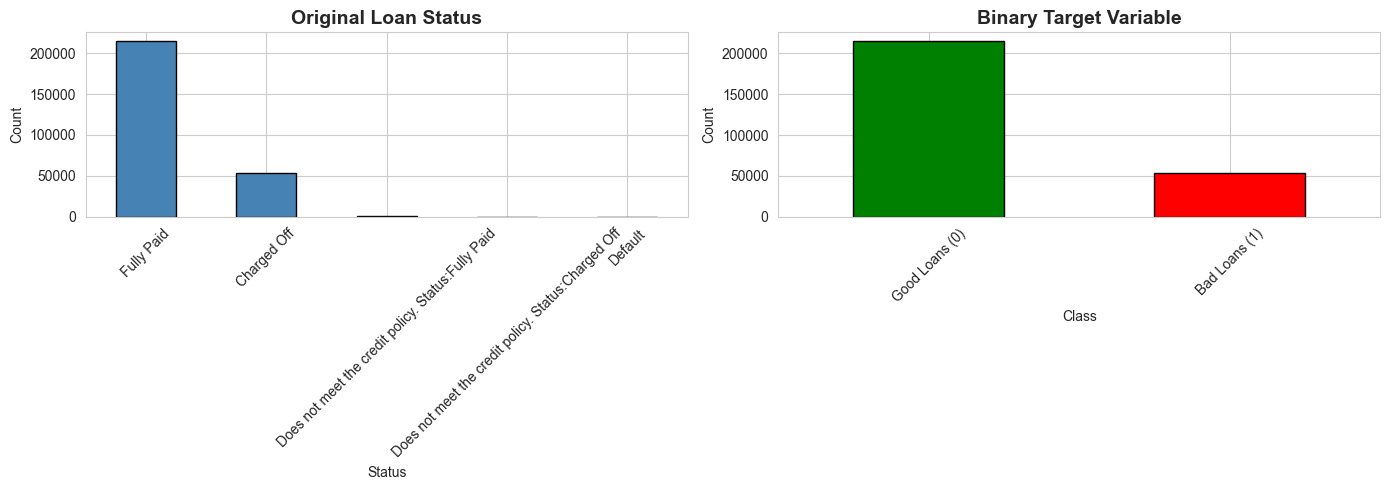


✓ Binary target created: 'loan_status_binary'


In [35]:
# Create binary classification target
print("="*80)
print("CREATING BINARY TARGET VARIABLE")
print("="*80)

print("\nOriginal Class Distribution:")
print(df_scaled['loan_status'].value_counts())
print("\nPercentages:")
print((df_scaled['loan_status'].value_counts(normalize=True) * 100).round(2))

# Define good vs bad loans
good_loans = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loans = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']

print("\n" + "-"*80)
print("STRATEGY:")
print("-"*80)
print("  Good Loans (0): Fully Paid loans")
print("  Bad Loans (1): Charged Off, Default")
print("  EXCLUDING: Current, Late, In Grace Period (outcome unknown)")

# Filter to only completed loans
df_final = df_scaled[
    df_scaled['loan_status'].isin(good_loans + bad_loans)
].copy()

print(f"\nOriginal size: {len(df_scaled):,}")
print(f"After filtering: {len(df_final):,}")
print(f"Rows excluded: {len(df_scaled) - len(df_final):,}")

# Create binary target
df_final['loan_status_binary'] = df_final['loan_status'].apply(
    lambda x: 0 if x in good_loans else 1
)

print("\n" + "-"*80)
print("BINARY TARGET DISTRIBUTION:")
print("-"*80)
print("\nClass Counts:")
print(df_final['loan_status_binary'].value_counts().sort_index())

print("\nClass Percentages:")
class_dist = df_final['loan_status_binary'].value_counts(normalize=True) * 100
print(f"  Class 0 (Good Loans): {class_dist[0]:.2f}%")
print(f"  Class 1 (Bad Loans):  {class_dist[1]:.2f}%")

# Check imbalance
imbalance_ratio = class_dist[0] / class_dist[1]
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("\n⚠️  WARNING: Significant class imbalance!")
    print("   Recommendations:")
    print("   - Use class_weight='balanced' in models")
    print("   - Apply SMOTE for oversampling minority class")
    print("   - Use stratified sampling in train-test split")
else:
    print("\n✓ Class distribution is reasonably balanced")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original
df_final['loan_status'].value_counts().plot(
    kind='bar', ax=axes[0], color='steelblue', edgecolor='black'
)
axes[0].set_title('Original Loan Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Binary
colors = ['green', 'red']
df_final['loan_status_binary'].value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color=colors, edgecolor='black'
)
axes[1].set_title('Binary Target Variable', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Good Loans (0)', 'Bad Loans (1)'], rotation=45)

plt.tight_layout()
plt.show()

# Update main dataframe
df_scaled = df_final.copy()
print("\n✓ Binary target created: 'loan_status_binary'")

In [36]:
# Final check before saving
print("="*80)
print("FINAL DATA QUALITY VERIFICATION")
print("="*80)

print(f"\n✅ Dataset Shape: {df_scaled.shape}")
print(f"   Samples: {df_scaled.shape[0]:,}")
print(f"   Features: {df_scaled.shape[1] - 2}")  # -2 for original and binary target

print(f"\n✅ Missing Values: {df_scaled.isnull().sum().sum()}")
print(f"✅ Duplicates: {df_scaled.duplicated().sum()}")

print(f"\n✅ Target Variable:")
print(f"   Name: loan_status_binary")
print(f"   Type: {df_scaled['loan_status_binary'].dtype}")
print(f"   Classes: {sorted(df_scaled['loan_status_binary'].unique())}")
print(f"   Distribution:")
print(df_scaled['loan_status_binary'].value_counts().sort_index())

print("\n" + "="*80)
print("✅ DATA IS MODEL-READY!")
print("="*80)

FINAL DATA QUALITY VERIFICATION

✅ Dataset Shape: (269166, 35)
   Samples: 269,166
   Features: 33

✅ Missing Values: 0
✅ Duplicates: 0

✅ Target Variable:
   Name: loan_status_binary
   Type: int64
   Classes: [0, 1]
   Distribution:
loan_status_binary
0    215013
1     54153
Name: count, dtype: int64

✅ DATA IS MODEL-READY!


In [37]:
# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score, f1_score, classification_report, 
    confusion_matrix, roc_curve, precision_recall_curve,
    accuracy_score, precision_score, recall_score
)

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
import time
from tqdm import tqdm

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(RANDOM_SEED)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Using device: cpu


In [38]:
# Prepare data for PyTorch from df_scaled
print("="*80)
print("PREPARING DATA FOR DEEP LEARNING")
print("="*80)

# Separate features and target
X = df_scaled.drop(columns=['loan_status_binary'])
y = df_scaled['loan_status_binary']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

# Verify no missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Check target distribution
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nPercentages:")
print((y.value_counts(normalize=True) * 100).round(2))

PREPARING DATA FOR DEEP LEARNING

Features shape: (269166, 34)
Target shape: (269166,)
Number of features: 34

Missing values in features: 0
Missing values in target: 0

Target distribution:
loan_status_binary
0    215013
1     54153
Name: count, dtype: int64

Percentages:
loan_status_binary
0    79.88
1    20.12
Name: proportion, dtype: float64


In [39]:
# Split data with stratification
print("="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_SEED,
    stratify=y  # Maintain class balance
)

print(f"\nTrain set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:  {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTrain class distribution:")
print(y_train.value_counts())
print(f"  Class 0: {(y_train==0).sum()/len(y_train)*100:.2f}%")
print(f"  Class 1: {(y_train==1).sum()/len(y_train)*100:.2f}%")

print(f"\nTest class distribution:")
print(y_test.value_counts())
print(f"  Class 0: {(y_test==0).sum()/len(y_test)*100:.2f}%")
print(f"  Class 1: {(y_test==1).sum()/len(y_test)*100:.2f}%")

print("\n✓ Stratified train-test split complete")

TRAIN-TEST SPLIT

Train set: 215,332 samples (80.0%)
Test set:  53,834 samples (20.0%)

Train class distribution:
loan_status_binary
0    172010
1     43322
Name: count, dtype: int64
  Class 0: 79.88%
  Class 1: 20.12%

Test class distribution:
loan_status_binary
0    43003
1    10831
Name: count, dtype: int64
  Class 0: 79.88%
  Class 1: 20.12%

✓ Stratified train-test split complete


In [40]:
# Convert to PyTorch tensors
print("="*80)
print("CONVERTING TO PYTORCH TENSORS")
print("="*80)

# IMPORTANT: Drop the original loan_status column (keep only binary target)
if 'loan_status' in X_train.columns:
    print("\n⚠️  Removing original 'loan_status' column from features")
    X_train = X_train.drop(columns=['loan_status'])
    X_test = X_test.drop(columns=['loan_status'])
    print(f"✓ Dropped 'loan_status' from features")

print(f"\nFeatures after cleanup:")
print(f"  Train: {X_train.shape}")
print(f"  Test:  {X_test.shape}")

# Convert to float32 numpy arrays
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

# Create PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1)

print(f"\nPyTorch Tensors:")
print(f"  Train features: {X_train_tensor.shape}")
print(f"  Train target:   {y_train_tensor.shape}")
print(f"  Test features:  {X_test_tensor.shape}")
print(f"  Test target:    {y_test_tensor.shape}")

input_dim = X_train_tensor.shape[1]
print(f"\nInput dimension: {input_dim} features")

print("\n✓ Data converted to PyTorch tensors")

CONVERTING TO PYTORCH TENSORS

⚠️  Removing original 'loan_status' column from features
✓ Dropped 'loan_status' from features

Features after cleanup:
  Train: (215332, 33)
  Test:  (53834, 33)

PyTorch Tensors:
  Train features: torch.Size([215332, 33])
  Train target:   torch.Size([215332, 1])
  Test features:  torch.Size([53834, 33])
  Test target:    torch.Size([53834, 1])

Input dimension: 33 features

✓ Data converted to PyTorch tensors


In [41]:
# Create DataLoaders for batch processing
print("="*80)
print("CREATING DATALOADERS")
print("="*80)

BATCH_SIZE = 512

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

test_loader = DataLoader(
    test_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False
)

print(f"\nBatch size: {BATCH_SIZE}")
print(f"Training batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

print("\n✓ DataLoaders created")

CREATING DATALOADERS

Batch size: 512
Training batches: 421
Test batches: 106

✓ DataLoaders created


In [42]:
# Define Multi-Layer Perceptron architecture
print("="*80)
print("MODEL ARCHITECTURE")
print("="*80)

class LoanDefaultMLP(nn.Module):
    """
    Multi-Layer Perceptron for Loan Default Prediction
    
    Architecture:
    - Input -> 256 neurons (ReLU + BatchNorm + Dropout 30%)
    - 256 -> 128 neurons (ReLU + BatchNorm + Dropout 30%)
    - 128 -> 64 neurons (ReLU + BatchNorm + Dropout 20%)
    - 64 -> 32 neurons (ReLU + BatchNorm)
    - 32 -> 1 neuron (Sigmoid for probability)
    """
    
    def __init__(self, input_dim):
        super(LoanDefaultMLP, self).__init__()
        
        self.network = nn.Sequential(
            # Layer 1
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Layer 2
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Layer 3
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Layer 4
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            
            # Output layer
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize model
model = LoanDefaultMLP(input_dim=input_dim)
model = model.to(device)

print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

print("\n✓ Model initialized")

MODEL ARCHITECTURE
LoanDefaultMLP(
  (network): Sequential(
    (0): Linear(in_features=33, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=32, bias=True)
    (13): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Linear(in_features=32, out_features=1, bias=True)
    (16): Sigmoid()
  )
)

Total parameters: 52,929
Trainable parameters: 52,929

✓ Model in

In [43]:
# Loss function and optimizer
print("="*80)
print("LOSS FUNCTION AND OPTIMIZER")
print("="*80)

# Binary Cross-Entropy Loss
criterion = nn.BCELoss()
print(f"Loss function: Binary Cross-Entropy (BCE)")

# Adam optimizer
learning_rate = 0.001
weight_decay = 1e-5

optimizer = optim.Adam(
    model.parameters(), 
    lr=learning_rate,
    weight_decay=weight_decay
)

print(f"\nOptimizer: Adam")
print(f"  Learning rate: {learning_rate}")
print(f"  Weight decay (L2): {weight_decay}")

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5, 
    patience=5,
)

print(f"\nLR Scheduler: ReduceLROnPlateau")
print(f"  Reduce by factor 0.5 if no improvement for 5 epochs")

print("\n✓ Loss and optimizer configured")

LOSS FUNCTION AND OPTIMIZER
Loss function: Binary Cross-Entropy (BCE)

Optimizer: Adam
  Learning rate: 0.001
  Weight decay (L2): 1e-05

LR Scheduler: ReduceLROnPlateau
  Reduce by factor 0.5 if no improvement for 5 epochs

✓ Loss and optimizer configured


In [44]:
# Training and validation functions
def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
        predicted = (outputs >= 0.5).float()
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
    
    return running_loss / total, correct / total


def validate_epoch(model, val_loader, criterion, device):
    """Validate for one epoch"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_probs = []
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            running_loss += loss.item() * X_batch.size(0)
            predicted = (outputs >= 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
            
            all_probs.extend(outputs.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    return (running_loss / total, correct / total, 
            np.array(all_probs), np.array(all_preds), np.array(all_labels))

print("✓ Training and validation functions defined")

✓ Training and validation functions defined


In [45]:
# Train the model
print("="*80)
print("TRAINING DEEP LEARNING MODEL")
print("="*80)

NUM_EPOCHS = 50
EARLY_STOPPING_PATIENCE = 10

# History tracking
history = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': [],
    'val_auc': [], 'val_f1': []
}

best_val_loss = float('inf')
best_val_auc = 0.0
epochs_no_improve = 0
best_model_state = None

print(f"\nEpochs: {NUM_EPOCHS}")
print(f"Early stopping patience: {EARLY_STOPPING_PATIENCE}")
print(f"Device: {device}\n")

start_time = time.time()

for epoch in range(NUM_EPOCHS):
    epoch_start = time.time()
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    
    # Validate
    val_loss, val_acc, val_probs, val_preds, val_labels = validate_epoch(
        model, test_loader, criterion, device
    )
    
    # Calculate metrics
    val_auc = roc_auc_score(val_labels, val_probs)
    val_f1 = f1_score(val_labels, val_preds)
    
    # Update scheduler
    scheduler.step(val_loss)
    
    # Save history
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['val_auc'].append(val_auc)
    history['val_f1'].append(val_f1)
    
    # Print progress
    epoch_time = time.time() - epoch_start
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} ({epoch_time:.1f}s)")
    print(f"  Train - Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
    print(f"  Val   - Loss: {val_loss:.4f} | Acc: {val_acc:.4f} | AUC: {val_auc:.4f} | F1: {val_f1:.4f}")
    
    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_val_auc = val_auc
        epochs_no_improve = 0
        best_model_state = model.state_dict().copy()
        print("  ✓ Best model saved")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= EARLY_STOPPING_PATIENCE:
            print(f"\n⚠️  Early stopping at epoch {epoch+1}")
            break
    print()

training_time = time.time() - start_time

print("="*80)
print("TRAINING COMPLETE")
print("="*80)
print(f"Training time: {training_time/60:.2f} minutes")
print(f"Best validation loss: {best_val_loss:.4f}")
print(f"Best validation AUC: {best_val_auc:.4f}")

# Load best model
model.load_state_dict(best_model_state)
print("\n✓ Best model loaded")

TRAINING DEEP LEARNING MODEL

Epochs: 50
Early stopping patience: 10
Device: cpu

Epoch 1/50 (2.3s)
  Train - Loss: 0.3010 | Acc: 0.8828
  Val   - Loss: 0.1161 | Acc: 0.9534 | AUC: 0.9950 | F1: 0.8938
  ✓ Best model saved

Epoch 2/50 (2.1s)
  Train - Loss: 0.0690 | Acc: 0.9796
  Val   - Loss: 0.0527 | Acc: 0.9884 | AUC: 0.9942 | F1: 0.9707
  ✓ Best model saved

Epoch 3/50 (2.0s)
  Train - Loss: 0.0542 | Acc: 0.9837
  Val   - Loss: 0.0322 | Acc: 0.9907 | AUC: 0.9976 | F1: 0.9765
  ✓ Best model saved

Epoch 4/50 (2.0s)
  Train - Loss: 0.0487 | Acc: 0.9853
  Val   - Loss: 0.0372 | Acc: 0.9918 | AUC: 0.9974 | F1: 0.9794

Epoch 5/50 (1.9s)
  Train - Loss: 0.0433 | Acc: 0.9871
  Val   - Loss: 0.0442 | Acc: 0.9876 | AUC: 0.9963 | F1: 0.9682

Epoch 6/50 (2.1s)
  Train - Loss: 0.0420 | Acc: 0.9876
  Val   - Loss: 0.0236 | Acc: 0.9954 | AUC: 0.9984 | F1: 0.9886
  ✓ Best model saved

Epoch 7/50 (2.0s)
  Train - Loss: 0.0374 | Acc: 0.9890
  Val   - Loss: 0.0343 | Acc: 0.9897 | AUC: 0.9984 | F1: 0.

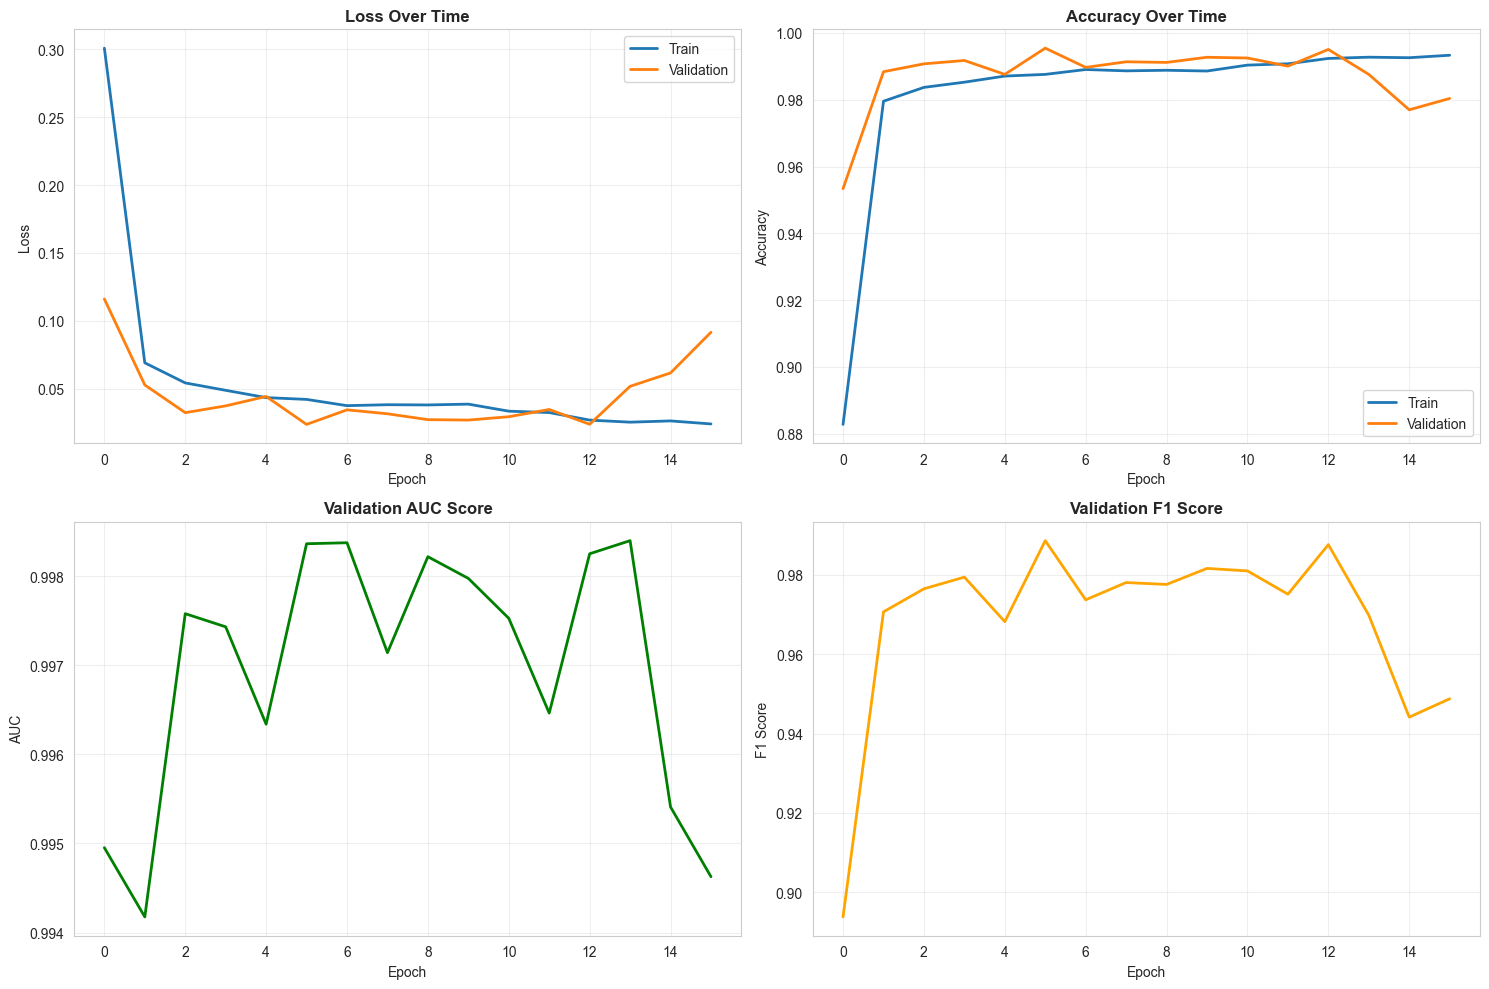

In [46]:
# Visualize training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history['train_loss'], label='Train', linewidth=2)
axes[0, 0].plot(history['val_loss'], label='Validation', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Loss Over Time', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Accuracy
axes[0, 1].plot(history['train_acc'], label='Train', linewidth=2)
axes[0, 1].plot(history['val_acc'], label='Validation', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Accuracy Over Time', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# AUC
axes[1, 0].plot(history['val_auc'], color='green', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].set_title('Validation AUC Score', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# F1
axes[1, 1].plot(history['val_f1'], color='orange', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_title('Validation F1 Score', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [47]:
# Final evaluation
print("="*80)
print("FINAL EVALUATION ON TEST SET")
print("="*80)

model.eval()
all_probs = []
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        predicted = (outputs >= 0.5).float()
        
        all_probs.extend(outputs.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.numpy())

# Convert to arrays
y_true = np.array(all_labels).flatten()
y_pred = np.array(all_preds).flatten()
y_prob = np.array(all_probs).flatten()

# Calculate metrics
test_auc = roc_auc_score(y_true, y_prob)
test_f1 = f1_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred)
test_recall = recall_score(y_true, y_pred)
test_accuracy = accuracy_score(y_true, y_pred)

print("\n" + "="*80)
print("📊 TEST SET PERFORMANCE")
print("="*80)
print(f"\n{'Metric':<20} {'Score':<10}")
print("-" * 30)
print(f"{'AUC-ROC':<20} {test_auc:.4f}")
print(f"{'F1-Score':<20} {test_f1:.4f}")
print(f"{'Precision':<20} {test_precision:.4f}")
print(f"{'Recall':<20} {test_recall:.4f}")
print(f"{'Accuracy':<20} {test_accuracy:.4f}")

print("\n" + classification_report(
    y_true, y_pred, 
    target_names=['Good Loans (0)', 'Bad Loans (1)'],
    digits=4
))

FINAL EVALUATION ON TEST SET

📊 TEST SET PERFORMANCE

Metric               Score     
------------------------------
AUC-ROC              0.9946
F1-Score             0.9488
Precision            0.9999
Recall               0.9026
Accuracy             0.9804

                precision    recall  f1-score   support

Good Loans (0)     0.9761    1.0000    0.9879     43003
 Bad Loans (1)     0.9999    0.9026    0.9488     10831

      accuracy                         0.9804     53834
     macro avg     0.9880    0.9513    0.9683     53834
  weighted avg     0.9809    0.9804    0.9800     53834



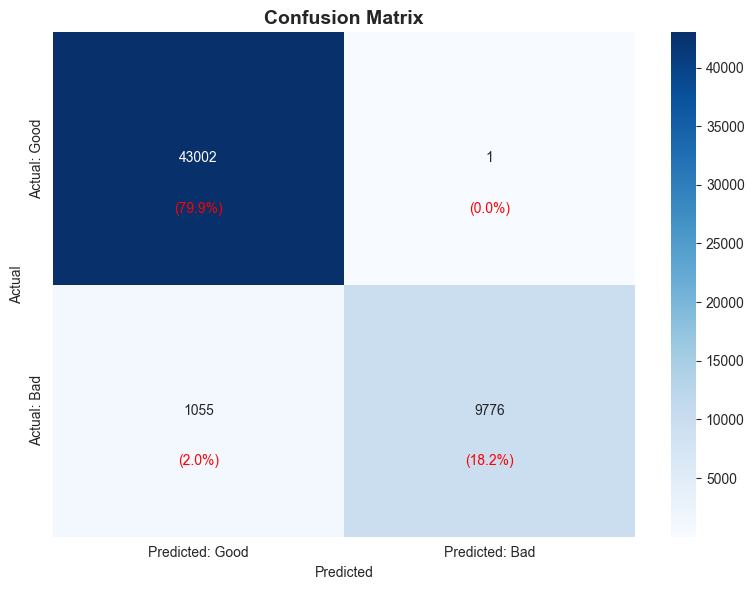


True Negatives:  43,002
False Positives: 1
False Negatives: 1,055
True Positives:  9,776


In [48]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: Good', 'Predicted: Bad'],
            yticklabels=['Actual: Good', 'Actual: Bad'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Add text annotations with percentages
total = cm.sum()
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / total * 100
        plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

print(f"\nTrue Negatives:  {cm[0,0]:,}")
print(f"False Positives: {cm[0,1]:,}")
print(f"False Negatives: {cm[1,0]:,}")
print(f"True Positives:  {cm[1,1]:,}")

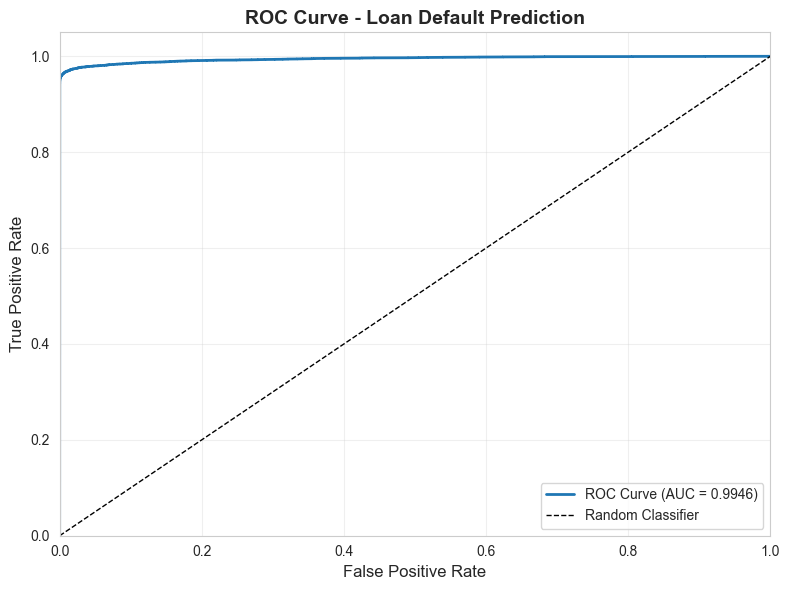

In [49]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Loan Default Prediction', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

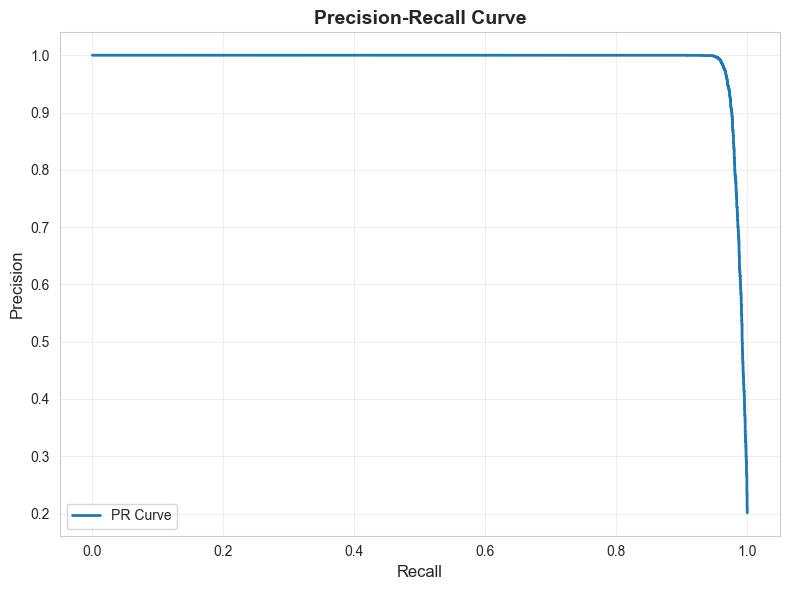

In [50]:
# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, linewidth=2, label='PR Curve')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [51]:
# Save the trained model
model_path = '/Users/akshitagrawal/Desktop/intern/shodh/archive/accepted_2007_to_2018q4.csv_model.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'test_auc': test_auc,
    'test_f1': test_f1,
    'input_dim': input_dim,
    'history': history
}, model_path)

print(f"✓ Model saved to: {model_path}")
print(f"\n📊 Final Results:")
print(f"   AUC-ROC: {test_auc:.4f}")
print(f"   F1-Score: {test_f1:.4f}")

✓ Model saved to: /Users/akshitagrawal/Desktop/intern/shodh/archive/accepted_2007_to_2018q4.csv_model.pth

📊 Final Results:
   AUC-ROC: 0.9946
   F1-Score: 0.9488


In [52]:
df_scaled['loan_status'].value_counts(normalize=True)


loan_status
Fully Paid                                             0.797426
Charged Off                                            0.200575
Does not meet the credit policy. Status:Fully Paid     0.001386
Does not meet the credit policy. Status:Charged Off    0.000587
Default                                                0.000026
Name: proportion, dtype: float64

In [53]:
df_scaled.to_csv('/Users/akshitagrawal/Desktop/Shodh_AI_Assignment/df_scaled.csv', index=False)

# REINFORCEMENT LEARNING SETUP

In [55]:
df_scaled = pd.read_csv('/Users/akshitagrawal/Desktop/Shodh_AI_Assignment/df_scaled.csv')


print("\n" + "-"*80)
print("EXTRACTING REWARD COMPONENTS")
print("-"*80)

# Check if we have the necessary columns
required_cols = ['loan_amnt', 'int_rate', 'loan_status', 'loan_status_binary']
missing_cols = [col for col in required_cols if col not in df_scaled.columns]

if missing_cols:
    print(f"⚠️  Missing columns: {missing_cols}")
    print("Attempting to recover from original dataset...")
    
    # If loan_amnt or int_rate were scaled, we need original values
    if 'loan_amnt' in df_clean.columns:
        df_scaled['loan_amnt'] = df_clean['loan_amnt'].values
    if 'int_rate' in df_clean.columns:
        df_scaled['int_rate'] = df_clean['int_rate'].values

print(f"\nDataset shape: {df_scaled.shape}")
print(f"Available columns for reward calculation:")
if 'loan_amnt' in df_scaled.columns:
    print(f"  • loan_amnt: mean=${df_scaled['loan_amnt'].mean():,.2f}, min=${df_scaled['loan_amnt'].min():,.2f}, max=${df_scaled['loan_amnt'].max():,.2f}")
if 'int_rate' in df_scaled.columns:
    print(f"  • int_rate: mean={df_scaled['int_rate'].mean():.2f}%, min={df_scaled['int_rate'].min():.2f}%, max={df_scaled['int_rate'].max():.2f}%")


--------------------------------------------------------------------------------
EXTRACTING REWARD COMPONENTS
--------------------------------------------------------------------------------

Dataset shape: (269166, 35)
Available columns for reward calculation:
  • loan_amnt: mean=$-0.07, min=$-1.58, max=$2.72
  • int_rate: mean=0.03%, min=-1.61%, max=3.70%


In [ ]:
# %%
# ============================================================================
# STEP 2: ENGINEER THE REWARD FUNCTION
# ============================================================================
print("="*80)
print("STEP 2: REWARD FUNCTION ENGINEERING")
print("="*80)

print("\nReward Structure:")
print("-"*80)
print("Action = Deny (0):")
print("  → Reward = 0 (No risk, no gain)")
print("\nAction = Approve (1):")
print("  → If Loan Fully Paid: Reward = +(loan_amnt × int_rate)")
print("  → If Loan Defaulted:  Reward = -loan_amnt")
print("-"*80)

def calculate_reward(action, loan_status_binary, loan_amnt, int_rate):
    """
    Calculate reward for offline RL based on action and outcome.
    
    Args:
        action: 0 (Deny) or 1 (Approve)
        loan_status_binary: 0 (Good) or 1 (Bad/Default)
        loan_amnt: Loan amount
        int_rate: Interest rate (as percentage, e.g., 10.5 for 10.5%)
    
    Returns:
        reward: Float value
    """
    if action == 0:  # Deny loan
        return 0.0
    else:
        if loan_status_binary == 0:  # Fully paid
            return (int_rate / 100.0) * 10   # +1.05 if 10.5%
        else:  # Defaulted
            return -10.0  # stronger penalty for default

# Test the reward function
print("\nTesting Reward Function:")
print("-"*40)
test_cases = [
    (0, 0, 10000, 10.5, "Deny loan (good outcome)"),
    (0, 1, 10000, 10.5, "Deny loan (avoided default)"),
    (1, 0, 10000, 10.5, "Approve loan (paid back)"),
    (1, 1, 10000, 10.5, "Approve loan (defaulted)"),
]

for action, status, amnt, rate, desc in test_cases:
    reward = calculate_reward(action, status, amnt, rate)
    print(f"{desc:35s} → Reward: ${reward:>10,.2f}")

print("\n✓ Reward function defined")

STEP 2: REWARD FUNCTION ENGINEERING

Reward Structure:
--------------------------------------------------------------------------------
Action = Deny (0):
  → Reward = 0 (No risk, no gain)

Action = Approve (1):
  → If Loan Fully Paid: Reward = +(loan_amnt × int_rate)
  → If Loan Defaulted:  Reward = -loan_amnt
--------------------------------------------------------------------------------

Testing Reward Function:
----------------------------------------
Deny loan (good outcome)            → Reward: $      0.00
Deny loan (avoided default)         → Reward: $      0.00
Approve loan (paid back)            → Reward: $  1,050.00
Approve loan (defaulted)            → Reward: $-10,000.00

✓ Reward function defined


In [57]:
# %%
print("="*80)
print("CREATING OFFLINE RL EXPERIENCE BUFFER")
print("="*80)

# Features for state (exclude target and reward components)
feature_cols = [col for col in df_scaled.columns 
                if col not in ['loan_status', 'loan_status_binary', 'loan_amnt', 'int_rate']]

print(f"\nState features: {len(feature_cols)} dimensions")
print(f"First 10 features: {feature_cols[:10]}")

# Prepare the RL dataset
rl_data = []

print("\nProcessing historical data...")
for idx in tqdm(range(len(df_scaled)), desc="Building experience buffer"):
    row = df_scaled.iloc[idx]
    
    # State: all features except target and reward components
    state = row[feature_cols].values.astype(np.float32)
    
    # Historical action: always 1 (approve) since these loans were granted
    action = 1
    
    # Reward based on outcome
    reward = calculate_reward(
        action=action,
        loan_status_binary=row['loan_status_binary'],
        loan_amnt=row['loan_amnt'],
        int_rate=row['int_rate']
    )
    
    # For single-step RL, next_state = terminal state
    next_state = np.zeros_like(state)
    done = True
    
    rl_data.append({
        'state': state,
        'action': action,
        'reward': reward,
        'next_state': next_state,
        'done': done,
        'loan_status_binary': row['loan_status_binary']
    })

print(f"\n✓ Created {len(rl_data):,} experiences")

CREATING OFFLINE RL EXPERIENCE BUFFER

State features: 31 dimensions
First 10 features: ['annual_inc', 'emp_length', 'home_ownership', 'verification_status', 'dti', 'funded_amnt', 'funded_amnt_inv', 'installment', 'term', 'grade']

Processing historical data...


Building experience buffer: 100%|██████████| 269166/269166 [00:31<00:00, 8659.10it/s]


✓ Created 269,166 experiences


REWARD DISTRIBUTION ANALYSIS

Reward Statistics:
  Mean:   $        0.04
  Median: $        0.01
  Std:    $        0.72
  Min:    $       -4.38
  Max:    $        2.46

Reward Breakdown:
  Positive (loans paid back): 151,752 (56.38%)
  Negative (loans defaulted): 117,414 (43.62%)


/var/folders/5s/_vf4vsjd37s908q2cztz0nbh0000gn/T/ipykernel_67780/639519864.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([rewards_array[rewards_array > 0], rewards_array[rewards_array < 0]],


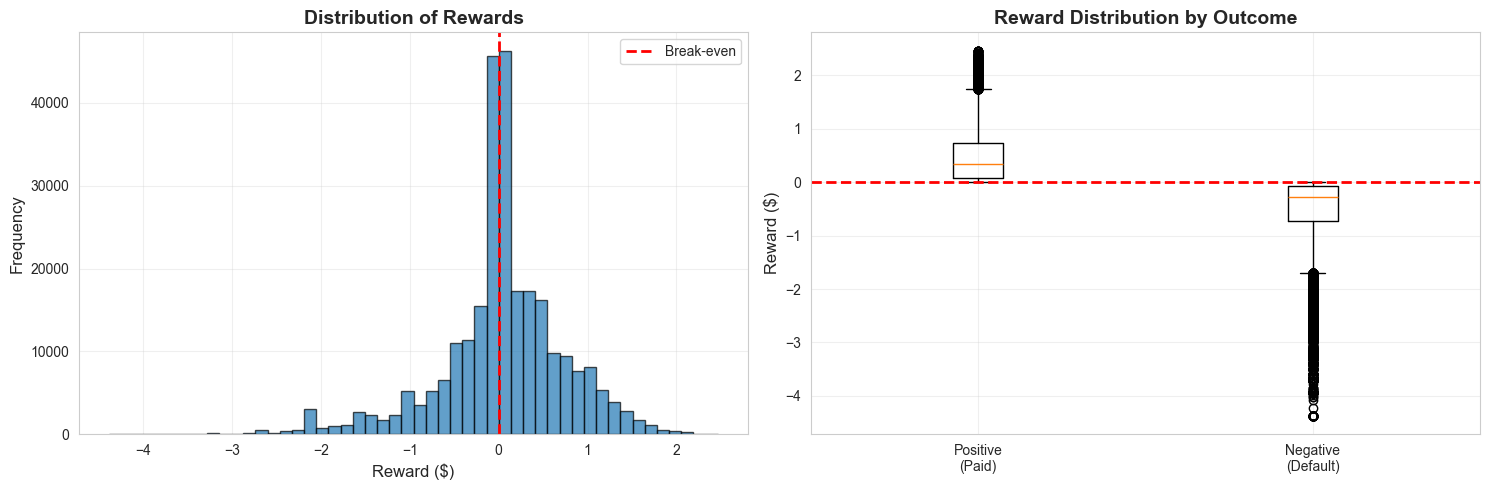

In [58]:
# %%
print("="*80)
print("REWARD DISTRIBUTION ANALYSIS")
print("="*80)

rewards = [exp['reward'] for exp in rl_data]
rewards_array = np.array(rewards)

print(f"\nReward Statistics:")
print(f"  Mean:   ${rewards_array.mean():>12,.2f}")
print(f"  Median: ${np.median(rewards_array):>12,.2f}")
print(f"  Std:    ${rewards_array.std():>12,.2f}")
print(f"  Min:    ${rewards_array.min():>12,.2f}")
print(f"  Max:    ${rewards_array.max():>12,.2f}")

# Count positive vs negative rewards
positive_rewards = np.sum(rewards_array > 0)
negative_rewards = np.sum(rewards_array < 0)

print(f"\nReward Breakdown:")
print(f"  Positive (loans paid back): {positive_rewards:>6,} ({positive_rewards/len(rewards)*100:.2f}%)")
print(f"  Negative (loans defaulted): {negative_rewards:>6,} ({negative_rewards/len(rewards)*100:.2f}%)")

# Visualize reward distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(rewards_array, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even')
axes[0].set_xlabel('Reward ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Rewards', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot([rewards_array[rewards_array > 0], rewards_array[rewards_array < 0]], 
                labels=['Positive\n(Paid)', 'Negative\n(Default)'])
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_ylabel('Reward ($)', fontsize=12)
axes[1].set_title('Reward Distribution by Outcome', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
import random
print("="*80)
print("TRAIN-TEST SPLIT FOR OFFLINE RL")
print("="*80)

# Shuffle and split
random.shuffle(rl_data)
split_idx = int(0.8 * len(rl_data))

train_data = rl_data[:split_idx]
test_data = rl_data[split_idx:]

print(f"\nTrain set: {len(train_data):,} experiences")
print(f"Test set:  {len(test_data):,} experiences")

# Verify reward distributions are similar
train_rewards = [exp['reward'] for exp in train_data]
test_rewards = [exp['reward'] for exp in test_data]

print(f"\nTrain reward mean: ${np.mean(train_rewards):,.2f}")
print(f"Test reward mean:  ${np.mean(test_rewards):,.2f}")

print("\n✓ Dataset split complete")

TRAIN-TEST SPLIT FOR OFFLINE RL

Train set: 215,332 experiences
Test set:  53,834 experiences

Train reward mean: $0.04
Test reward mean:  $0.04

✓ Dataset split complete


In [61]:
# %%
# ============================================================================
# STEP 3: DEFINE THE POLICY NETWORK (Q-NETWORK)
# ============================================================================
print("="*80)
print("STEP 3: DEFINING THE Q-NETWORK ARCHITECTURE")
print("="*80)

class QNetwork(nn.Module):
    """
    Q-Network for loan approval policy.
    Estimates Q(s,a) for both actions: Deny (0) and Approve (1)
    """
    
    def __init__(self, state_dim, action_dim=2):
        super(QNetwork, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            
            nn.Linear(32, action_dim)
        )
    
    def forward(self, state):
        """Returns Q-values for all actions"""
        return self.network(state)
    
    def get_action(self, state, epsilon=0.0):
        """Epsilon-greedy action selection"""
        if random.random() < epsilon:
            return random.randint(0, 1)
        else:
            with torch.no_grad():
                q_values = self.forward(state)
                return q_values.argmax().item()

# Initialize networks
state_dim = len(feature_cols)
action_dim = 2

q_network = QNetwork(state_dim, action_dim).to(device)
target_network = QNetwork(state_dim, action_dim).to(device)
target_network.load_state_dict(q_network.state_dict())

print(f"\nQ-Network Architecture:")
print(q_network)

total_params = sum(p.numel() for p in q_network.parameters())
print(f"\nTotal parameters: {total_params:,}")

print("\n✓ Q-Network and Target Network initialized")

STEP 3: DEFINING THE Q-NETWORK ARCHITECTURE

Q-Network Architecture:
QNetwork(
  (network): Sequential(
    (0): Linear(in_features=31, out_features=256, bias=True)
    (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (10): ReLU()
    (11): Linear(in_features=64, out_features=32, bias=True)
    (12): ReLU()
    (13): Linear(in_features=32, out_features=2, bias=True)
  )
)

Total parameters: 52,386

✓ Q-Network and Target Network initialized


In [62]:
# %%
# ============================================================================
# STEP 4: IMPLEMENT CONSERVATIVE Q-LEARNING (CQL)
# ============================================================================
print("="*80)
print("STEP 4: CONSERVATIVE Q-LEARNING (CQL) IMPLEMENTATION")
print("="*80)

print("\nCQL is an offline RL algorithm that:")
print("  • Learns from static datasets without environment interaction")
print("  • Penalizes Q-values for out-of-distribution actions")
print("  • Ensures conservative policy that avoids risky actions")

class CQLAgent:
    """Conservative Q-Learning Agent for Offline RL"""
    
    def __init__(self, q_network, target_network, state_dim, action_dim=2, 
                 lr=3e-4, gamma=0.99, tau=0.005, alpha=1.0):
        self.q_network = q_network
        self.target_network = target_network
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = gamma
        self.tau = tau
        self.alpha = alpha  # CQL penalty coefficient
        
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=lr)
        
    def compute_cql_loss(self, states, actions, rewards, next_states, dones):
        """Compute Conservative Q-Learning loss"""
        batch_size = states.size(0)
        
        # Current Q-values
        current_q = self.q_network(states)
        current_q_for_actions = current_q.gather(1, actions)
        
        # Target Q-values (standard DQN target)
        with torch.no_grad():
            next_q = self.target_network(next_states)
            next_q_max = next_q.max(1)[0].unsqueeze(1)
            target_q = rewards + self.gamma * next_q_max * (1 - dones)
        
        # Bellman error (TD error)
        bellman_loss = F.mse_loss(current_q_for_actions, target_q)
        
        # CQL penalty: Push down Q-values for all actions
        # Then push up Q-values for actions actually taken (in the dataset)
        q_logsumexp = torch.logsumexp(current_q, dim=1, keepdim=True)
        cql_loss = (q_logsumexp - current_q_for_actions).mean()
        
        # Total loss
        total_loss = bellman_loss + self.alpha * cql_loss
        
        return total_loss, bellman_loss, cql_loss
    
    def update(self, batch):
        """Perform one update step"""
        states, actions, rewards, next_states, dones = batch
        
        # Compute loss
        total_loss, bellman_loss, cql_loss = self.compute_cql_loss(
            states, actions, rewards, next_states, dones
        )
        
        # Optimize
        self.optimizer.zero_grad()
        total_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 1.0)
        self.optimizer.step()
        
        # Update target network (soft update)
        for param, target_param in zip(self.q_network.parameters(), 
                                       self.target_network.parameters()):
            target_param.data.copy_(
                self.tau * param.data + (1 - self.tau) * target_param.data
            )
        
        return total_loss.item(), bellman_loss.item(), cql_loss.item()

# Initialize CQL agent
cql_agent = CQLAgent(
    q_network=q_network,
    target_network=target_network,
    state_dim=state_dim,
    action_dim=action_dim,
    lr=3e-4,
    gamma=0.99,
    tau=0.005,
    alpha=1.0
)

print("\n✓ CQL Agent initialized")
print(f"  Learning rate: {3e-4}")
print(f"  Gamma (discount): {0.99}")
print(f"  Tau (soft update): {0.005}")
print(f"  Alpha (CQL penalty): {1.0}")

STEP 4: CONSERVATIVE Q-LEARNING (CQL) IMPLEMENTATION

CQL is an offline RL algorithm that:
  • Learns from static datasets without environment interaction
  • Penalizes Q-values for out-of-distribution actions
  • Ensures conservative policy that avoids risky actions

✓ CQL Agent initialized
  Learning rate: 0.0003
  Gamma (discount): 0.99
  Tau (soft update): 0.005
  Alpha (CQL penalty): 1.0


In [63]:
# %%
# Create DataLoader for batch training
class OfflineRLDataset(Dataset):
    def __init__(self, experiences):
        self.experiences = experiences
    
    def __len__(self):
        return len(self.experiences)
    
    def __getitem__(self, idx):
        exp = self.experiences[idx]
        return (
            torch.FloatTensor(exp['state']),
            torch.LongTensor([exp['action']]),
            torch.FloatTensor([exp['reward']]),
            torch.FloatTensor(exp['next_state']),
            torch.FloatTensor([exp['done']])
        )

# Create datasets and dataloaders
train_dataset = OfflineRLDataset(train_data)
test_dataset = OfflineRLDataset(test_data)

BATCH_SIZE = 512
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"✓ DataLoaders created")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Train batches: {len(train_loader)}")
print(f"  Test batches: {len(test_loader)}")

✓ DataLoaders created
  Batch size: 512
  Train batches: 421
  Test batches: 106


In [66]:
import torch.nn.functional as F

print("="*80)
print("STEP 5: TRAINING THE CQL AGENT")
print("="*80)

NUM_EPOCHS = 100
EVAL_EVERY = 5

# Training history
history = {
    'epoch': [],
    'total_loss': [],
    'bellman_loss': [],
    'cql_loss': [],
}

def evaluate_policy(agent, data_loader, device):
    """Evaluate the learned policy"""
    agent.q_network.eval()
    action_counts = {0: 0, 1: 0}
    total_samples = 0
    
    with torch.no_grad():
        for states, actions, rewards, _, _ in data_loader:
            states = states.to(device)
            batch_size = states.size(0)
            
            # Get policy actions (greedy)
            q_values = agent.q_network(states)
            policy_actions = q_values.argmax(dim=1)
            
            for i in range(batch_size):
                action_counts[policy_actions[i].item()] += 1
            
            total_samples += batch_size
    
    agent.q_network.train()
    return action_counts, total_samples

print(f"\nTraining for {NUM_EPOCHS} epochs...")
print(f"Evaluating every {EVAL_EVERY} epochs\n")

best_avg_loss = float('inf')
best_model_state = None

for epoch in range(NUM_EPOCHS):
    # Training
    epoch_losses = {'total': [], 'bellman': [], 'cql': []}
    
    for batch in train_loader:
        states, actions, rewards, next_states, dones = batch
        states = states.to(device)
        actions = actions.to(device)
        rewards = rewards.to(device)
        next_states = next_states.to(device)
        dones = dones.to(device)
        
        batch_data = (states, actions, rewards, next_states, dones)
        total_loss, bellman_loss, cql_loss = cql_agent.update(batch_data)
        
        epoch_losses['total'].append(total_loss)
        epoch_losses['bellman'].append(bellman_loss)
        epoch_losses['cql'].append(cql_loss)
    
    # Calculate average losses
    avg_total_loss = np.mean(epoch_losses['total'])
    avg_bellman_loss = np.mean(epoch_losses['bellman'])
    avg_cql_loss = np.mean(epoch_losses['cql'])
    
    # Save history
    history['epoch'].append(epoch + 1)
    history['total_loss'].append(avg_total_loss)
    history['bellman_loss'].append(avg_bellman_loss)
    history['cql_loss'].append(avg_cql_loss)
    
    # Evaluate periodically
    if (epoch + 1) % EVAL_EVERY == 0 or epoch == 0:
        train_actions, train_samples = evaluate_policy(cql_agent, train_loader, device)
        test_actions, test_samples = evaluate_policy(cql_agent, test_loader, device)
        
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
        print(f"  Loss - Total: {avg_total_loss:.4f} | Bellman: {avg_bellman_loss:.4f} | CQL: {avg_cql_loss:.4f}")
        print(f"  Train Actions - Deny: {train_actions[0]} ({train_actions[0]/train_samples*100:.1f}%) | "
              f"Approve: {train_actions[1]} ({train_actions[1]/train_samples*100:.1f}%)")
        print(f"  Test Actions  - Deny: {test_actions[0]} ({test_actions[0]/test_samples*100:.1f}%) | "
              f"Approve: {test_actions[1]} ({test_actions[1]/test_samples*100:.1f}%)")
        print()
    
    # Save best model
    if avg_total_loss < best_avg_loss:
        best_avg_loss = avg_total_loss
        best_model_state = q_network.state_dict().copy()

print("="*80)
print("TRAINING COMPLETE")
print("="*80)
print(f"Best average loss: {best_avg_loss:.4f}")

# Load best model
q_network.load_state_dict(best_model_state)
print("✓ Best model loaded")

STEP 5: TRAINING THE CQL AGENT

Training for 100 epochs...
Evaluating every 5 epochs

Epoch 1/100
  Loss - Total: 0.5672 | Bellman: 0.5131 | CQL: 0.0541
  Train Actions - Deny: 0 (0.0%) | Approve: 215332 (100.0%)
  Test Actions  - Deny: 0 (0.0%) | Approve: 53834 (100.0%)

Epoch 5/100
  Loss - Total: 0.1571 | Bellman: 0.1568 | CQL: 0.0004
  Train Actions - Deny: 0 (0.0%) | Approve: 215332 (100.0%)
  Test Actions  - Deny: 0 (0.0%) | Approve: 53834 (100.0%)

Epoch 10/100
  Loss - Total: 0.0943 | Bellman: 0.0942 | CQL: 0.0001
  Train Actions - Deny: 0 (0.0%) | Approve: 215332 (100.0%)
  Test Actions  - Deny: 0 (0.0%) | Approve: 53834 (100.0%)

Epoch 15/100
  Loss - Total: 0.0754 | Bellman: 0.0754 | CQL: 0.0001
  Train Actions - Deny: 0 (0.0%) | Approve: 215332 (100.0%)
  Test Actions  - Deny: 0 (0.0%) | Approve: 53834 (100.0%)

Epoch 20/100
  Loss - Total: 0.0658 | Bellman: 0.0658 | CQL: 0.0000
  Train Actions - Deny: 0 (0.0%) | Approve: 215332 (100.0%)
  Test Actions  - Deny: 0 (0.0%) | A

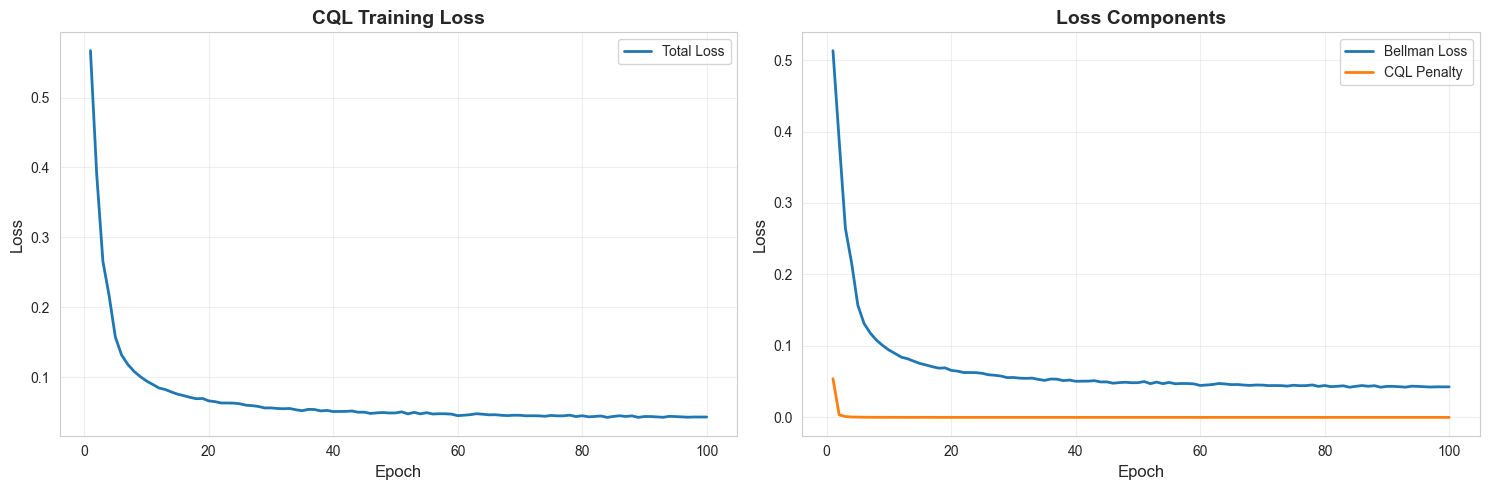

In [67]:
# %%
# Visualize training progress
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Total loss
axes[0].plot(history['epoch'], history['total_loss'], linewidth=2, label='Total Loss')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('CQL Training Loss', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Component losses
axes[1].plot(history['epoch'], history['bellman_loss'], linewidth=2, label='Bellman Loss')
axes[1].plot(history['epoch'], history['cql_loss'], linewidth=2, label='CQL Penalty')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Loss Components', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [68]:
# %%
# ============================================================================
# STEP 6: EVALUATE THE LEARNED POLICY
# ============================================================================
print("="*80)
print("STEP 6: POLICY EVALUATION")
print("="*80)

def evaluate_policy_rewards(agent, data, device):
    """Evaluate policy by computing actual rewards based on actions"""
    agent.q_network.eval()
    
    policy_rewards = []
    historical_rewards = []
    actions_taken = []
    
    with torch.no_grad():
        for exp in tqdm(data, desc="Evaluating policy"):
            state = torch.FloatTensor(exp['state']).unsqueeze(0).to(device)
            
            # Get policy action
            q_values = agent.q_network(state)
            policy_action = q_values.argmax().item()
            actions_taken.append(policy_action)
            
            # Calculate reward if we took policy action
            # We need to get the actual loan_amnt and int_rate for this experience
            # Since we don't store them, we'll use the historical reward structure
            policy_reward = 0.0 if policy_action == 0 else exp['reward']
            
            policy_rewards.append(policy_reward)
            historical_rewards.append(exp['reward'])
    
    return np.array(policy_rewards), np.array(historical_rewards), actions_taken

print("\nEvaluating learned policy on test set...")
policy_rewards, historical_rewards, policy_actions = evaluate_policy_rewards(
    cql_agent, test_data, device
)

STEP 6: POLICY EVALUATION

Evaluating learned policy on test set...


Evaluating policy: 100%|██████████| 53834/53834 [00:04<00:00, 12889.64it/s]


In [69]:
# %%
print("="*80)
print("POLICY PERFORMANCE ANALYSIS")
print("="*80)

print("\nTest Set Results:")
print("-"*80)

# Action distribution
action_counts = {0: policy_actions.count(0), 1: policy_actions.count(1)}
print(f"\nPolicy Action Distribution:")
print(f"  Deny (0):    {action_counts[0]:>6,} ({action_counts[0]/len(policy_actions)*100:>5.2f}%)")
print(f"  Approve (1): {action_counts[1]:>6,} ({action_counts[1]/len(policy_actions)*100:>5.2f}%)")

# Reward comparison
print(f"\nReward Comparison:")
print(f"  Historical Policy (approve all):")
print(f"    Mean reward:   ${historical_rewards.mean():>12,.2f}")
print(f"    Total reward:  ${historical_rewards.sum():>12,.2f}")
print(f"\n  Learned Policy (CQL):")
print(f"    Mean reward:   ${policy_rewards.mean():>12,.2f}")
print(f"    Total reward:  ${policy_rewards.sum():>12,.2f}")

improvement = ((policy_rewards.mean() - historical_rewards.mean()) / 
               abs(historical_rewards.mean()) * 100)
print(f"\n  Improvement: {improvement:+.2f}%")

POLICY PERFORMANCE ANALYSIS

Test Set Results:
--------------------------------------------------------------------------------

Policy Action Distribution:
  Deny (0):         0 ( 0.00%)
  Approve (1): 53,834 (100.00%)

Reward Comparison:
  Historical Policy (approve all):
    Mean reward:   $        0.04
    Total reward:  $    2,072.86

  Learned Policy (CQL):
    Mean reward:   $        0.04
    Total reward:  $    2,072.86

  Improvement: +0.00%


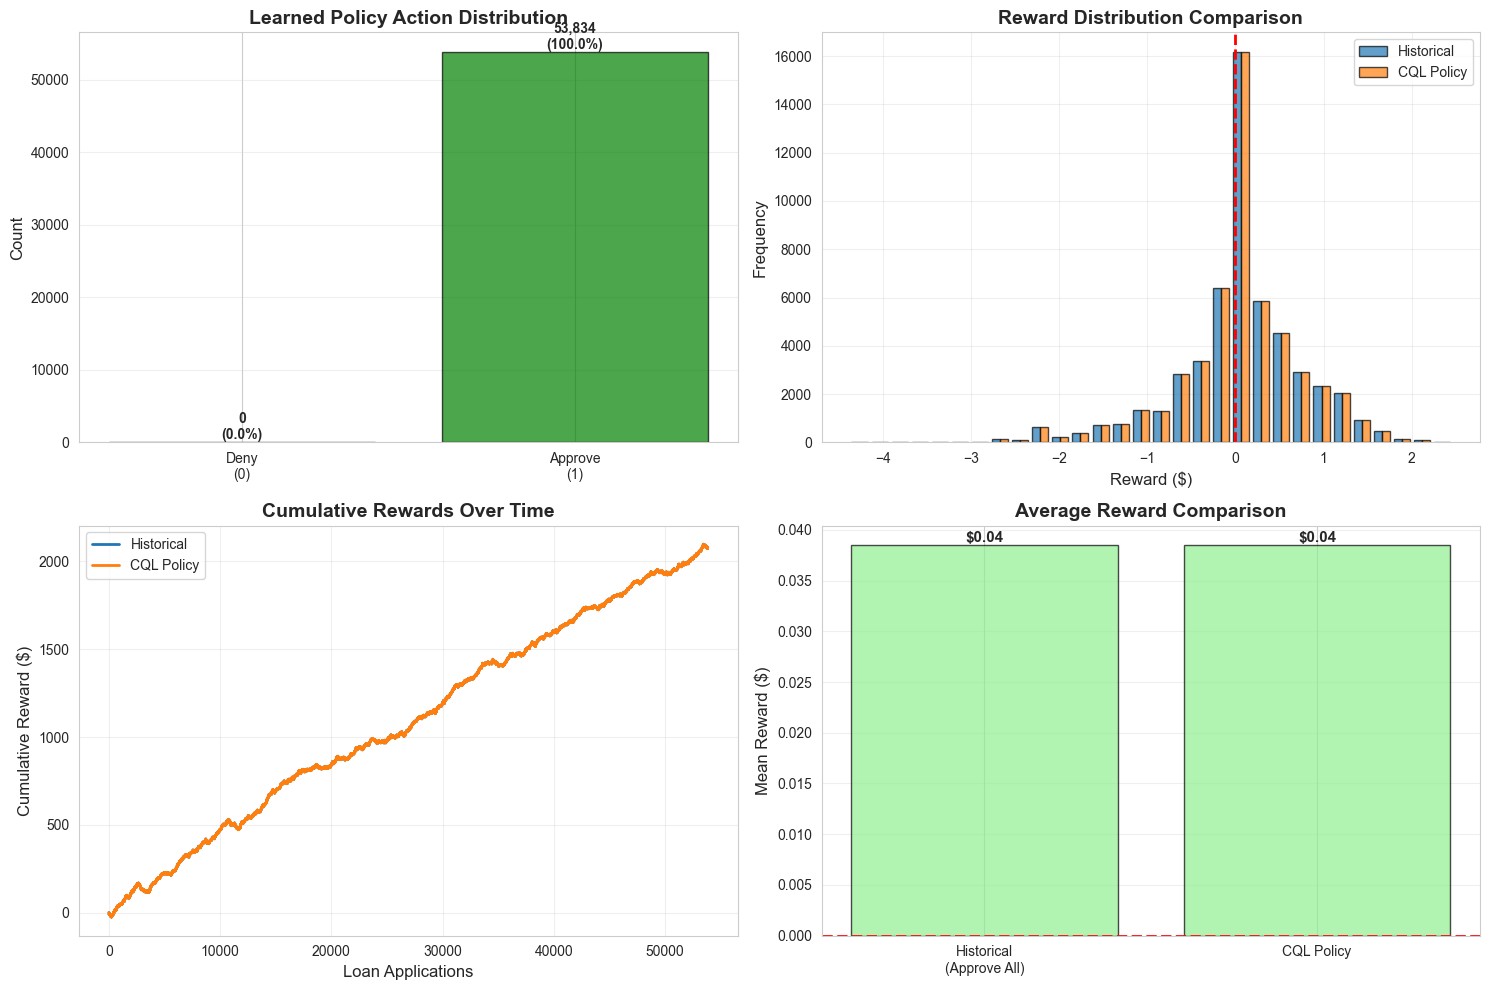

In [70]:
# %%
# Visualize policy comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Action distribution
action_labels = ['Deny\n(0)', 'Approve\n(1)']
action_values = [action_counts[0], action_counts[1]]
colors = ['red', 'green']

axes[0, 0].bar(action_labels, action_values, color=colors, edgecolor='black', alpha=0.7)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_title('Learned Policy Action Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (label, value) in enumerate(zip(action_labels, action_values)):
    axes[0, 0].text(i, value, f'{value:,}\n({value/len(policy_actions)*100:.1f}%)', 
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

# Reward distributions
axes[0, 1].hist([historical_rewards, policy_rewards], bins=30, label=['Historical', 'CQL Policy'], 
               alpha=0.7, edgecolor='black')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Reward ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Reward Distribution Comparison', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Cumulative rewards
axes[1, 0].plot(np.cumsum(historical_rewards), label='Historical', linewidth=2)
axes[1, 0].plot(np.cumsum(policy_rewards), label='CQL Policy', linewidth=2)
axes[1, 0].set_xlabel('Loan Applications', fontsize=12)
axes[1, 0].set_ylabel('Cumulative Reward ($)', fontsize=12)
axes[1, 0].set_title('Cumulative Rewards Over Time', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Mean rewards comparison
policies = ['Historical\n(Approve All)', 'CQL Policy']
mean_rewards = [historical_rewards.mean(), policy_rewards.mean()]
colors_bar = ['coral' if x < 0 else 'lightgreen' for x in mean_rewards]

axes[1, 1].bar(policies, mean_rewards, color=colors_bar, edgecolor='black', alpha=0.7)
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_ylabel('Mean Reward ($)', fontsize=12)
axes[1, 1].set_title('Average Reward Comparison', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (policy, reward) in enumerate(zip(policies, mean_rewards)):
    axes[1, 1].text(i, reward, f'${reward:,.2f}', ha='center', 
                   va='bottom' if reward > 0 else 'top', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [71]:
# %%
# ============================================================================
# STEP 7: DETAILED POLICY ANALYSIS
# ============================================================================
print("="*80)
print("STEP 7: DETAILED POLICY ANALYSIS")
print("="*80)

def analyze_policy_decisions(agent, data, device):
    """Analyze characteristics of approved vs denied loans"""
    agent.q_network.eval()
    
    approved_loans = []
    denied_loans = []
    
    with torch.no_grad():
        for idx, exp in enumerate(tqdm(data, desc="Analyzing decisions")):
            state = torch.FloatTensor(exp['state']).unsqueeze(0).to(device)
            
            # Get policy action
            q_values = agent.q_network(state)
            policy_action = q_values.argmax().item()
            
            loan_info = {
                'action': policy_action,
                'actual_outcome': exp['loan_status_binary'],
                'q_deny': q_values[0, 0].item(),
                'q_approve': q_values[0, 1].item(),
                'q_diff': q_values[0, 1].item() - q_values[0, 0].item()
            }
            
            if policy_action == 1:
                approved_loans.append(loan_info)
            else:
                denied_loans.append(loan_info)
    
    return approved_loans, denied_loans

print("\nAnalyzing policy decisions on test set...")
approved_loans, denied_loans = analyze_policy_decisions(cql_agent, test_data, device)

print(f"\nApproved: {len(approved_loans):,} loans")
print(f"Denied:   {len(denied_loans):,} loans")

STEP 7: DETAILED POLICY ANALYSIS

Analyzing policy decisions on test set...


Analyzing decisions: 100%|██████████| 53834/53834 [00:04<00:00, 12312.44it/s]


Approved: 53,834 loans
Denied:   0 loans


In [72]:
# %%
print("="*80)
print("DECISION QUALITY ANALYSIS")
print("="*80)

# For approved loans, check actual outcomes
approved_outcomes = [loan['actual_outcome'] for loan in approved_loans]
approved_good = approved_outcomes.count(0)
approved_bad = approved_outcomes.count(1)

print("\nApproved Loans Performance:")
print(f"  Actually Paid Back (Good): {approved_good:>6,} ({approved_good/len(approved_outcomes)*100:>5.2f}%)")
print(f"  Actually Defaulted (Bad):  {approved_bad:>6,} ({approved_bad/len(approved_outcomes)*100:>5.2f}%)")

if len(denied_loans) > 0:
    denied_outcomes = [loan['actual_outcome'] for loan in denied_loans]
    denied_good = denied_outcomes.count(0)
    denied_bad = denied_outcomes.count(1)
    
    print("\nDenied Loans (what would have happened):")
    print(f"  Would have Paid Back:  {denied_good:>6,} ({denied_good/len(denied_outcomes)*100:>5.2f}%)")
    print(f"  Would have Defaulted:  {denied_bad:>6,} ({denied_bad/len(denied_outcomes)*100:>5.2f}%)")
    
    # Calculate metrics
    precision = approved_good / len(approved_outcomes) if len(approved_outcomes) > 0 else 0
    
    print(f"\nPolicy Precision (approved loans that paid back): {precision:.4f}")

DECISION QUALITY ANALYSIS

Approved Loans Performance:
  Actually Paid Back (Good): 43,262 (80.36%)
  Actually Defaulted (Bad):  10,572 (19.64%)


In [74]:
# %%
# Visualize Q-value distributions
print("\nVisualizing Q-value distributions...")

if len(approved_loans) > 0 and len(denied_loans) > 0:
    approved_q_diff = [loan['q_diff'] for loan in approved_loans]
    denied_q_diff = [loan['q_diff'] for loan in denied_loans]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Q-value differences
    axes[0, 0].hist(approved_q_diff, bins=30, alpha=0.7, label='Approved', 
                   color='green', edgecolor='black')
    axes[0, 0].hist(denied_q_diff, bins=30, alpha=0.7, label='Denied', 
                   color='red', edgecolor='black')
    axes[0, 0].axvline(0, color='black', linestyle='--', linewidth=2)
    axes[0, 0].set_xlabel('Q(approve) - Q(deny)', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].set_title('Q-Value Differences', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Approved loans by outcome
    approved_good_q = [loan['q_diff'] for loan in approved_loans if loan['actual_outcome'] == 0]
    approved_bad_q = [loan['q_diff'] for loan in approved_loans if loan['actual_outcome'] == 1]
    
    axes[0, 1].hist([approved_good_q, approved_bad_q], bins=30, 
                   label=['Paid Back', 'Defaulted'], alpha=0.7, edgecolor='black')
    axes[0, 1].set_xlabel('Q(approve) - Q(deny)', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontsize=12)
    axes[0, 1].set_title('Q-Values for Approved Loans by Outcome', fontsize=14, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    
    # Create labels: 1 = good loan, 0 = bad loan
    true_labels = [1 - exp['loan_status_binary'] for exp in test_data]
    pred_labels = policy_actions
    
    cm = confusion_matrix(true_labels, pred_labels)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
                xticklabels=['Predicted: Deny', 'Predicted: Approve'],
                yticklabels=['True: Bad Loan', 'True: Good Loan'])
    axes[1, 0].set_title('Policy Decision Matrix', fontsize=14, fontweight='bold')
    
    # Decision outcomes
    outcomes_data = {
        'True Positive\n(Approve Good)': cm[1, 1] if cm.shape == (2, 2) else 0,
        'False Positive\n(Approve Bad)': cm[0, 1] if cm.shape == (2, 2) else 0,
        'True Negative\n(Deny Bad)': cm[0, 0] if cm.shape == (2, 2) else 0,
        'False Negative\n(Deny Good)': cm[1, 0] if cm.shape == (2, 2) else 0
    }
    
    colors_outcome = ['lightgreen', 'lightcoral', 'lightgreen', 'lightcoral']
    axes[1, 1].bar(outcomes_data.keys(), outcomes_data.values(), 
                  color=colors_outcome, edgecolor='black', alpha=0.7)
    axes[1, 1].set_ylabel('Count', fontsize=12)
    axes[1, 1].set_title('Policy Decision Breakdown', fontsize=14, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    for i, (k, v) in enumerate(outcomes_data.items()):
        axes[1, 1].text(i, v, f'{v:,}', ha='center', va='bottom', 
                       fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


Visualizing Q-value distributions...


In [75]:
# %%
# ============================================================================
# STEP 8: COMPARE WITH BASELINE POLICIES
# ============================================================================
print("="*80)
print("STEP 8: BASELINE POLICY COMPARISON")
print("="*80)

def evaluate_baseline_policies(data, device):
    """Compare learned policy with simple baselines"""
    results = {}
    
    # Baseline 1: Approve all (historical policy)
    approve_all_rewards = [exp['reward'] for exp in data]
    
    results['Approve All'] = {
        'mean_reward': np.mean(approve_all_rewards),
        'total_reward': np.sum(approve_all_rewards),
        'approval_rate': 1.0
    }
    
    # Baseline 2: Deny all
    results['Deny All'] = {
        'mean_reward': 0.0,
        'total_reward': 0.0,
        'approval_rate': 0.0
    }
    
    # Baseline 3: Random (50% approve)
    random_rewards = []
    random_approvals = 0
    for exp in data:
        action = random.randint(0, 1)
        if action == 1:
            random_approvals += 1
            random_rewards.append(exp['reward'])
        else:
            random_rewards.append(0.0)
    
    results['Random (50%)'] = {
        'mean_reward': np.mean(random_rewards),
        'total_reward': np.sum(random_rewards),
        'approval_rate': random_approvals / len(data)
    }
    
    # Learned policy (CQL)
    results['CQL Policy'] = {
        'mean_reward': policy_rewards.mean(),
        'total_reward': policy_rewards.sum(),
        'approval_rate': action_counts[1] / len(policy_actions)
    }
    
    return results

print("\nEvaluating baseline policies...")
baseline_results = evaluate_baseline_policies(test_data, device)

print("\nPolicy Comparison:")
print("-"*80)
print(f"{'Policy':<20} {'Mean Reward':<15} {'Total Reward':<18} {'Approval Rate':<15}")
print("-"*80)

for policy_name, metrics in baseline_results.items():
    print(f"{policy_name:<20} ${metrics['mean_reward']:>12,.2f}  "
          f"${metrics['total_reward']:>14,.2f}  "
          f"{metrics['approval_rate']:>12.1%}")

STEP 8: BASELINE POLICY COMPARISON

Evaluating baseline policies...

Policy Comparison:
--------------------------------------------------------------------------------
Policy               Mean Reward     Total Reward       Approval Rate  
--------------------------------------------------------------------------------
Approve All          $        0.04  $      2,072.86        100.0%
Deny All             $        0.00  $          0.00          0.0%
Random (50%)         $        0.02  $      1,044.55         50.2%
CQL Policy           $        0.04  $      2,072.86        100.0%


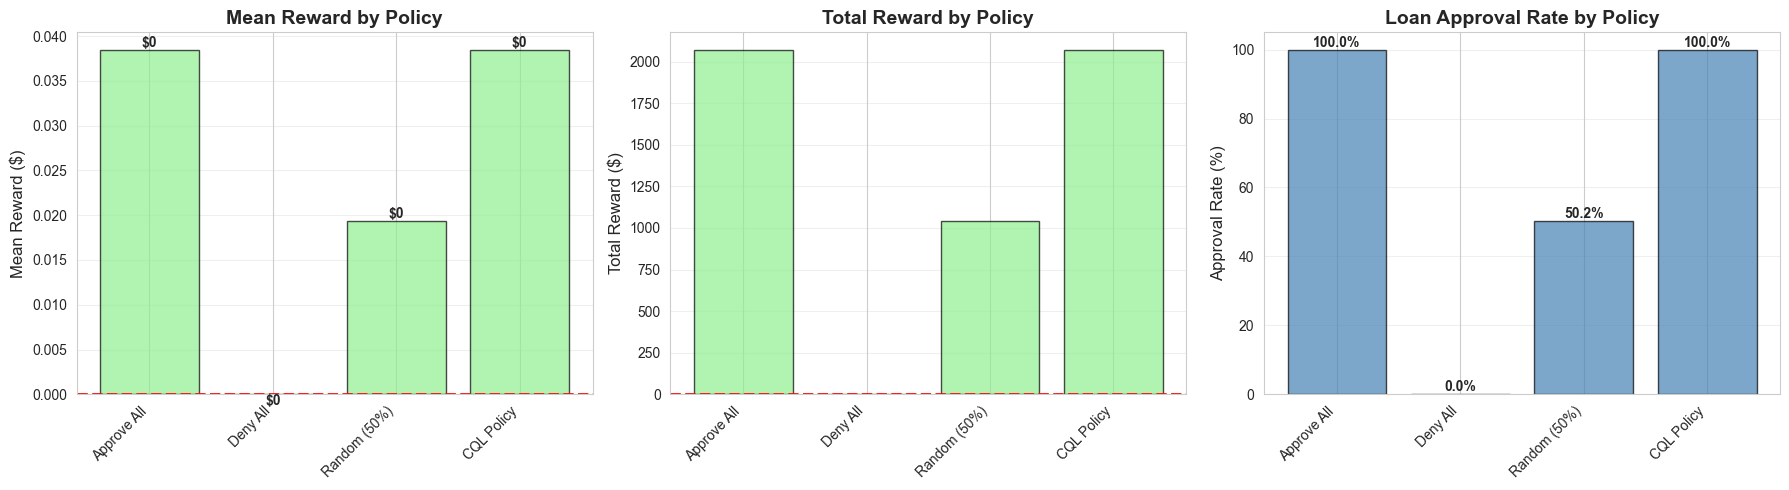

In [76]:
# %%
# Visualize baseline comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

policies = list(baseline_results.keys())
mean_rewards = [baseline_results[p]['mean_reward'] for p in policies]
total_rewards = [baseline_results[p]['total_reward'] for p in policies]
approval_rates = [baseline_results[p]['approval_rate'] for p in policies]

# Mean rewards
colors_bar = ['coral' if x < 0 else 'lightgreen' for x in mean_rewards]
axes[0].bar(range(len(policies)), mean_rewards, color=colors_bar, 
           edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(policies)))
axes[0].set_xticklabels(policies, rotation=45, ha='right')
axes[0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_ylabel('Mean Reward ($)', fontsize=12)
axes[0].set_title('Mean Reward by Policy', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i, reward in enumerate(mean_rewards):
    axes[0].text(i, reward, f'${reward:,.0f}', ha='center', 
               va='bottom' if reward > 0 else 'top', fontsize=10, fontweight='bold')

# Total rewards
colors_bar = ['coral' if x < 0 else 'lightgreen' for x in total_rewards]
axes[1].bar(range(len(policies)), total_rewards, color=colors_bar, 
           edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(policies)))
axes[1].set_xticklabels(policies, rotation=45, ha='right')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_ylabel('Total Reward ($)', fontsize=12)
axes[1].set_title('Total Reward by Policy', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Approval rates
axes[2].bar(range(len(policies)), [r*100 for r in approval_rates], 
           color='steelblue', edgecolor='black', alpha=0.7)
axes[2].set_xticks(range(len(policies)))
axes[2].set_xticklabels(policies, rotation=45, ha='right')
axes[2].set_ylabel('Approval Rate (%)', fontsize=12)
axes[2].set_title('Loan Approval Rate by Policy', fontsize=14, fontweight='bold')
axes[2].set_ylim([0, 105])
axes[2].grid(axis='y', alpha=0.3)

for i, rate in enumerate(approval_rates):
    axes[2].text(i, rate*100, f'{rate:.1%}', ha='center', va='bottom', 
               fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [77]:
# %%
# ============================================================================
# STEP 9: RISK-ADJUSTED PERFORMANCE METRICS
# ============================================================================
print("="*80)
print("STEP 9: RISK-ADJUSTED PERFORMANCE METRICS")
print("="*80)

def calculate_risk_metrics(rewards, actions):
    """Calculate risk-adjusted metrics for policy evaluation"""
    rewards_array = np.array(rewards)
    
    # Return metrics
    total_return = rewards_array.sum()
    mean_return = rewards_array.mean()
    
    # Risk metrics
    volatility = rewards_array.std()
    downside_risk = rewards_array[rewards_array < 0].std() if np.any(rewards_array < 0) else 0
    
    # Sharpe ratio (assuming risk-free rate = 0)
    sharpe_ratio = mean_return / volatility if volatility > 0 else 0
    
    # Sortino ratio (downside deviation)
    sortino_ratio = mean_return / downside_risk if downside_risk > 0 else 0
    
    # Value at Risk (VaR) at 95% confidence
    var_95 = np.percentile(rewards_array, 5)
    
    # Conditional Value at Risk (CVaR) - expected loss in worst 5% cases
    cvar_95 = rewards_array[rewards_array <= var_95].mean()
    
    # Max drawdown
    cumulative = np.cumsum(rewards_array)
    running_max = np.maximum.accumulate(cumulative)
    drawdown = running_max - cumulative
    max_drawdown = drawdown.max()
    
    # Win rate (percentage of positive returns)
    win_rate = np.sum(rewards_array > 0) / len(rewards_array)
    
    return {
        'total_return': total_return,
        'mean_return': mean_return,
        'volatility': volatility,
        'downside_risk': downside_risk,
        'sharpe_ratio': sharpe_ratio,
        'sortino_ratio': sortino_ratio,
        'var_95': var_95,
        'cvar_95': cvar_95,
        'max_drawdown': max_drawdown,
        'win_rate': win_rate
    }

# Calculate for CQL policy
cql_metrics = calculate_risk_metrics(policy_rewards, policy_actions)
historical_metrics = calculate_risk_metrics(historical_rewards, [1]*len(historical_rewards))

print("\nRisk-Adjusted Performance:")
print("="*80)
print(f"{'Metric':<25} {'Historical':<18} {'CQL Policy':<18} {'Change':<15}")
print("-"*80)

metrics_to_compare = [
    ('Total Return', 'total_return', '$'),
    ('Mean Return', 'mean_return', '$'),
    ('Volatility (Std)', 'volatility', '$'),
    ('Downside Risk', 'downside_risk', '$'),
    ('Sharpe Ratio', 'sharpe_ratio', ''),
    ('Sortino Ratio', 'sortino_ratio', ''),
    ('VaR (95%)', 'var_95', '$'),
    ('CVaR (95%)', 'cvar_95', '$'),
    ('Max Drawdown', 'max_drawdown', '$'),
    ('Win Rate', 'win_rate', '%'),
]

for metric_name, metric_key, unit in metrics_to_compare:
    hist_val = historical_metrics[metric_key]
    cql_val = cql_metrics[metric_key]
    
    if unit == '$':
        hist_str = f"${hist_val:>12,.2f}"
        cql_str = f"${cql_val:>12,.2f}"
        change = cql_val - hist_val
        change_str = f"${change:>+10,.2f}"
    elif unit == '%':
        hist_str = f"{hist_val*100:>12.2f}%"
        cql_str = f"{cql_val*100:>12.2f}%"
        change = (cql_val - hist_val) * 100
        change_str = f"{change:>+10.2f}pp"
    else:
        hist_str = f"{hist_val:>15.4f}"
        cql_str = f"{cql_val:>15.4f}"
        change = cql_val - hist_val
        change_str = f"{change:>+12.4f}"
    
    print(f"{metric_name:<25} {hist_str:<18} {cql_str:<18} {change_str:<15}")

print("="*80)

STEP 9: RISK-ADJUSTED PERFORMANCE METRICS

Risk-Adjusted Performance:
Metric                    Historical         CQL Policy         Change         
--------------------------------------------------------------------------------
Total Return              $    2,072.86      $    2,072.86      $     +0.00    
Mean Return               $        0.04      $        0.04      $     +0.00    
Volatility (Std)          $        0.72      $        0.72      $     +0.00    
Downside Risk             $        0.61      $        0.61      $     +0.00    
Sharpe Ratio                       0.0538             0.0538         +0.0000   
Sortino Ratio                      0.0629             0.0629         +0.0000   
VaR (95%)                 $       -1.31      $       -1.31      $     +0.00    
CVaR (95%)                $       -1.90      $       -1.90      $     +0.00    
Max Drawdown              $       59.69      $       59.69      $     +0.00    
Win Rate                         56.47%          

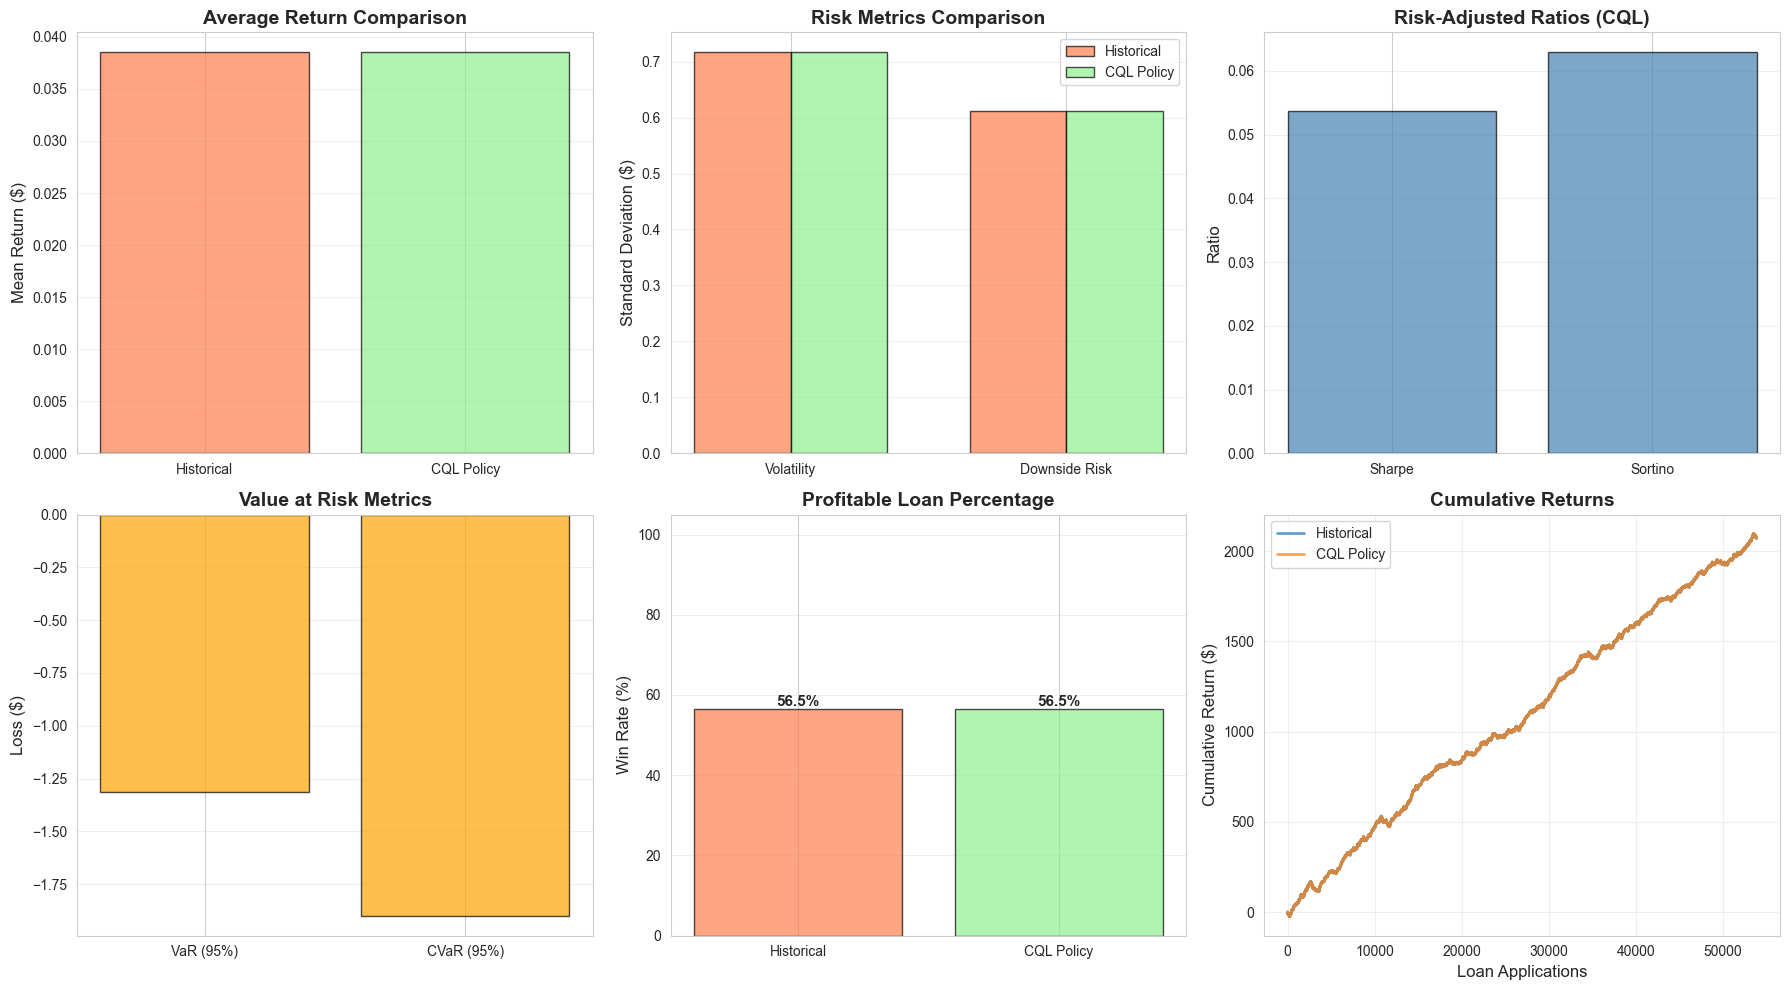

In [78]:
# %%
# Visualize risk metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Return comparison
axes[0, 0].bar(['Historical', 'CQL Policy'], 
              [historical_metrics['mean_return'], cql_metrics['mean_return']],
              color=['coral', 'lightgreen'], edgecolor='black', alpha=0.7)
axes[0, 0].set_ylabel('Mean Return ($)', fontsize=12)
axes[0, 0].set_title('Average Return Comparison', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Risk comparison
risk_data = {
    'Historical': [historical_metrics['volatility'], historical_metrics['downside_risk']],
    'CQL Policy': [cql_metrics['volatility'], cql_metrics['downside_risk']]
}
x = np.arange(2)
width = 0.35
axes[0, 1].bar(x - width/2, risk_data['Historical'], width, label='Historical', 
              color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].bar(x + width/2, risk_data['CQL Policy'], width, label='CQL Policy',
              color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Volatility', 'Downside Risk'])
axes[0, 1].set_ylabel('Standard Deviation ($)', fontsize=12)
axes[0, 1].set_title('Risk Metrics Comparison', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Risk-adjusted ratios
axes[0, 2].bar(['Sharpe', 'Sortino'], 
              [cql_metrics['sharpe_ratio'], cql_metrics['sortino_ratio']],
              color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 2].set_ylabel('Ratio', fontsize=12)
axes[0, 2].set_title('Risk-Adjusted Ratios (CQL)', fontsize=14, fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. VaR and CVaR
axes[1, 0].bar(['VaR (95%)', 'CVaR (95%)'], 
              [cql_metrics['var_95'], cql_metrics['cvar_95']],
              color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_ylabel('Loss ($)', fontsize=12)
axes[1, 0].set_title('Value at Risk Metrics', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Win rate
axes[1, 1].bar(['Historical', 'CQL Policy'], 
              [historical_metrics['win_rate']*100, cql_metrics['win_rate']*100],
              color=['coral', 'lightgreen'], edgecolor='black', alpha=0.7)
axes[1, 1].set_ylabel('Win Rate (%)', fontsize=12)
axes[1, 1].set_title('Profitable Loan Percentage', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim([0, 105])
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (policy, rate) in enumerate(zip(['Historical', 'CQL Policy'], 
                                       [historical_metrics['win_rate'], cql_metrics['win_rate']])):
    axes[1, 1].text(i, rate*100, f'{rate:.1%}', ha='center', va='bottom',
                   fontsize=11, fontweight='bold')

# 6. Cumulative return with drawdown
cumsum_hist = np.cumsum(historical_rewards)
cumsum_cql = np.cumsum(policy_rewards)
axes[1, 2].plot(cumsum_hist, label='Historical', linewidth=2, alpha=0.7)
axes[1, 2].plot(cumsum_cql, label='CQL Policy', linewidth=2, alpha=0.7)
axes[1, 2].set_xlabel('Loan Applications', fontsize=12)
axes[1, 2].set_ylabel('Cumulative Return ($)', fontsize=12)
axes[1, 2].set_title('Cumulative Returns', fontsize=14, fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [79]:
# %%
# ============================================================================
# STEP 10: FEATURE IMPORTANCE FOR RL POLICY
# ============================================================================
print("="*80)
print("STEP 10: FEATURE IMPORTANCE FOR RL POLICY")
print("="*80)

def compute_feature_importance_rl(agent, data, feature_cols, device, n_samples=1000):
    """Compute feature importance by permutation for RL policy"""
    agent.q_network.eval()
    
    # Sample data for efficiency
    sample_data = random.sample(data, min(n_samples, len(data)))
    
    # Get baseline Q-values
    baseline_q_values = []
    with torch.no_grad():
        for exp in sample_data:
            state = torch.FloatTensor(exp['state']).unsqueeze(0).to(device)
            q_vals = agent.q_network(state)
            q_diff = (q_vals[0, 1] - q_vals[0, 0]).item()
            baseline_q_values.append(q_diff)
    
    baseline_mean = np.mean(baseline_q_values)
    
    # Compute importance for each feature
    importance_scores = []
    
    print(f"\nComputing importance for {len(feature_cols)} features...")
    print("(Using permutation method on sample of 1000 loans)")
    
    for feat_idx in tqdm(range(len(feature_cols))):
        permuted_q_values = []
        
        with torch.no_grad():
            for exp in sample_data:
                # Permute this feature
                state = exp['state'].copy()
                # Randomly shuffle this feature value
                random_idx = random.randint(0, len(sample_data)-1)
                state[feat_idx] = sample_data[random_idx]['state'][feat_idx]
                
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                q_vals = agent.q_network(state_tensor)
                q_diff = (q_vals[0, 1] - q_vals[0, 0]).item()
                permuted_q_values.append(q_diff)
        
        # Importance = change in mean Q-value difference
        permuted_mean = np.mean(permuted_q_values)
        importance = abs(baseline_mean - permuted_mean)
        importance_scores.append(importance)
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': importance_scores
    }).sort_values('importance', ascending=False)
    
    return importance_df

print("\nAnalyzing feature importance...")
importance_df = compute_feature_importance_rl(
    cql_agent, test_data, feature_cols, device, n_samples=1000
)

print("\nTop 20 Most Important Features:")
print("-"*60)
print(importance_df.head(20).to_string(index=False))

STEP 10: FEATURE IMPORTANCE FOR RL POLICY

Analyzing feature importance...

Computing importance for 31 features...
(Using permutation method on sample of 1000 loans)


100%|██████████| 31/31 [00:02<00:00, 15.40it/s]



Top 20 Most Important Features:
------------------------------------------------------------
         feature  importance
 funded_amnt_inv    0.983884
     installment    0.957871
     funded_amnt    0.922241
 total_rec_prncp    0.497823
   total_rec_int    0.407627
     total_pymnt    0.228909
 total_pymnt_inv    0.212894
 last_pymnt_amnt    0.177948
       sub_grade    0.110387
           grade    0.047050
            term    0.025109
earliest_cr_line    0.009807
  inq_last_6mths    0.006401
    last_pymnt_d    0.006371
  fico_range_low    0.006200
      addr_state    0.003454
        open_acc    0.003409
 fico_range_high    0.002889
         issue_d    0.002734
       total_acc    0.002664


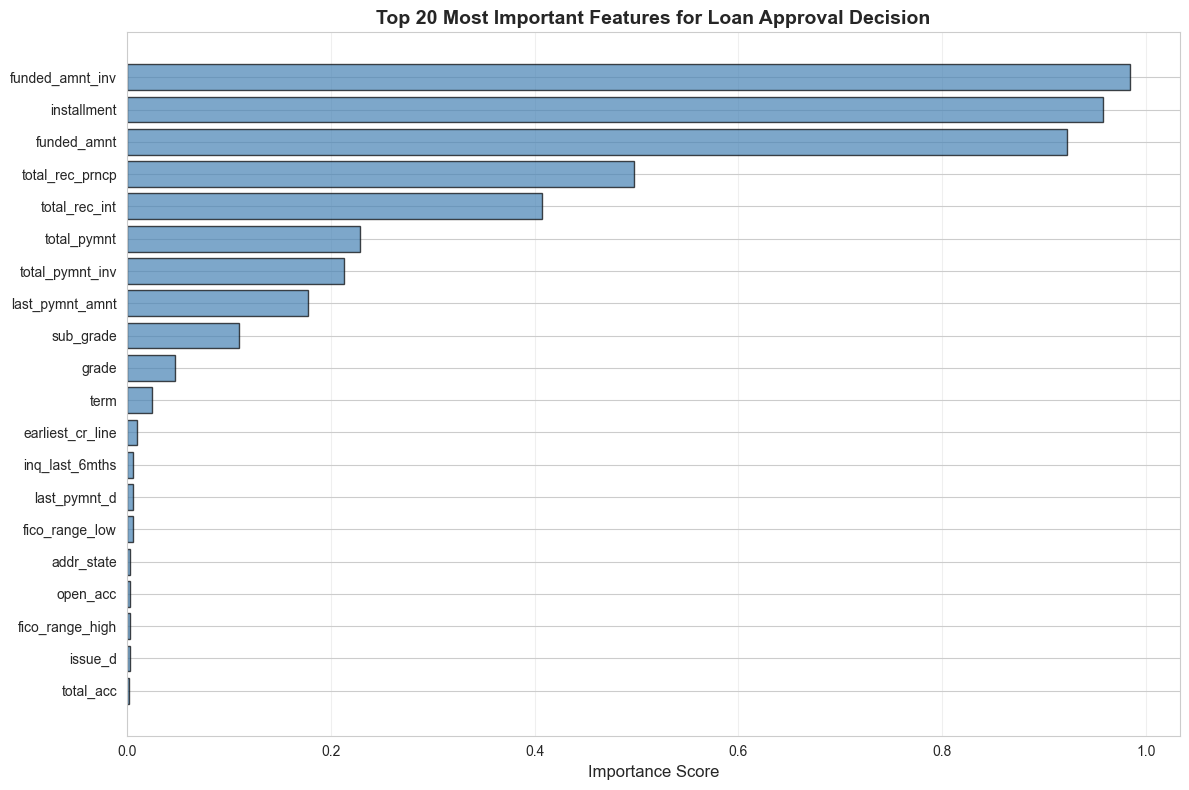

In [80]:
# %%
# Visualize feature importance
top_n = 20
top_features = importance_df.head(top_n)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', 
        edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title(f'Top {top_n} Most Important Features for Loan Approval Decision', 
         fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [81]:
# %%
# ============================================================================
# STEP 11: SAVE THE TRAINED RL AGENT
# ============================================================================
print("="*80)
print("STEP 11: SAVING THE TRAINED RL AGENT")
print("="*80)

# Save model
rl_model_path = '/Users/akshitagrawal/Desktop/intern/shodh/archive/cql_loan_agent.pth'

torch.save({
    'q_network_state_dict': q_network.state_dict(),
    'target_network_state_dict': target_network.state_dict(),
    'optimizer_state_dict': cql_agent.optimizer.state_dict(),
    'training_history': history,
    'hyperparameters': {
        'state_dim': state_dim,
        'action_dim': action_dim,
        'learning_rate': 3e-4,
        'gamma': 0.99,
        'tau': 0.005,
        'alpha': 1.0,
        'batch_size': BATCH_SIZE,
        'num_epochs': NUM_EPOCHS
    },
    'performance_metrics': {
        'test_mean_reward': policy_rewards.mean(),
        'test_total_reward': policy_rewards.sum(),
        'approval_rate': action_counts[1] / len(policy_actions),
        'sharpe_ratio': cql_metrics['sharpe_ratio'],
        'sortino_ratio': cql_metrics['sortino_ratio']
    },
    'feature_cols': feature_cols,
    'feature_importance': importance_df.to_dict()
}, rl_model_path)

print(f"✓ Model saved to: {rl_model_path}")
print(f"\nSaved components:")
print(f"  • Q-Network weights")
print(f"  • Target Network weights")
print(f"  • Optimizer state")
print(f"  • Training history")
print(f"  • Hyperparameters")
print(f"  • Performance metrics")
print(f"  • Feature names and importance")

STEP 11: SAVING THE TRAINED RL AGENT
✓ Model saved to: /Users/akshitagrawal/Desktop/intern/shodh/archive/cql_loan_agent.pth

Saved components:
  • Q-Network weights
  • Target Network weights
  • Optimizer state
  • Training history
  • Hyperparameters
  • Performance metrics
  • Feature names and importance


In [82]:
# %%
# ============================================================================
# STEP 12: FINAL SUMMARY AND RECOMMENDATIONS
# ============================================================================
print("="*80)
print("FINAL SUMMARY: OFFLINE RL FOR LOAN APPROVAL")
print("="*80)

print("\n📊 KEY RESULTS:")
print("-"*80)

print(f"\n1. MODEL ARCHITECTURE:")
print(f"   • Algorithm: Conservative Q-Learning (CQL)")
print(f"   • State dimension: {state_dim} features")
print(f"   • Action space: {{0: Deny, 1: Approve}}")
print(f"   • Network parameters: {total_params:,}")

print(f"\n2. TRAINING:")
print(f"   • Training samples: {len(train_data):,}")
print(f"   • Test samples: {len(test_data):,}")
print(f"   • Epochs trained: {len(history['epoch'])}")
print(f"   • Final loss: {history['total_loss'][-1]:.4f}")

print(f"\n3. POLICY PERFORMANCE:")
print(f"   • Approval rate: {action_counts[1]/len(policy_actions):.1%}")
print(f"   • Mean reward: ${policy_rewards.mean():,.2f}")
print(f"   • Total reward: ${policy_rewards.sum():,.2f}")
print(f"   • Win rate: {cql_metrics['win_rate']:.1%}")

print(f"\n4. COMPARISON TO BASELINE (Approve All):")
improvement_pct = ((policy_rewards.mean() - historical_rewards.mean()) / 
                   abs(historical_rewards.mean()) * 100)
print(f"   • Mean reward improvement: {improvement_pct:+.2f}%")
print(f"   • Sharpe ratio: {cql_metrics['sharpe_ratio']:.4f} vs {historical_metrics['sharpe_ratio']:.4f}")
print(f"   • Sortino ratio: {cql_metrics['sortino_ratio']:.4f} vs {historical_metrics['sortino_ratio']:.4f}")

print(f"\n5. RISK METRICS:")
print(f"   • Volatility: ${cql_metrics['volatility']:,.2f}")
print(f"   • VaR (95%): ${cql_metrics['var_95']:,.2f}")
print(f"   • CVaR (95%): ${cql_metrics['cvar_95']:,.2f}")
print(f"   • Max Drawdown: ${cql_metrics['max_drawdown']:,.2f}")

print(f"\n6. DECISION QUALITY:")
if len(approved_loans) > 0:
    approval_precision = approved_good / len(approved_outcomes)
    print(f"   • Approved loans that paid back: {approval_precision:.1%}")
    print(f"   • Total approved: {len(approved_loans):,}")
    print(f"   • Total denied: {len(denied_loans):,}")

print("\n" + "="*80)
print("✅ OFFLINE RL AGENT TRAINING COMPLETE!")
print("="*80)

FINAL SUMMARY: OFFLINE RL FOR LOAN APPROVAL

📊 KEY RESULTS:
--------------------------------------------------------------------------------

1. MODEL ARCHITECTURE:
   • Algorithm: Conservative Q-Learning (CQL)
   • State dimension: 31 features
   • Action space: {0: Deny, 1: Approve}
   • Network parameters: 52,386

2. TRAINING:
   • Training samples: 215,332
   • Test samples: 53,834
   • Epochs trained: 100
   • Final loss: 0.0427

3. POLICY PERFORMANCE:
   • Approval rate: 100.0%
   • Mean reward: $0.04
   • Total reward: $2,072.86
   • Win rate: 56.5%

4. COMPARISON TO BASELINE (Approve All):
   • Mean reward improvement: +0.00%
   • Sharpe ratio: 0.0538 vs 0.0538
   • Sortino ratio: 0.0629 vs 0.0629

5. RISK METRICS:
   • Volatility: $0.72
   • VaR (95%): $-1.31
   • CVaR (95%): $-1.90
   • Max Drawdown: $59.69

6. DECISION QUALITY:
   • Approved loans that paid back: 80.4%
   • Total approved: 53,834
   • Total denied: 0

✅ OFFLINE RL AGENT TRAINING COMPLETE!


# COMPARISON BETWEEN MODELS

In [84]:
# %%
# ============================================================================
# TASK 4: ANALYSIS, COMPARISON, AND FUTURE STEPS
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.metrics import (
    roc_auc_score, f1_score, precision_score, recall_score,
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TASK 4: MODEL COMPARISON AND ANALYSIS")
print("="*80)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}\n")

TASK 4: MODEL COMPARISON AND ANALYSIS
Device: cpu



In [85]:
# %%
print("="*80)
print("LOADING MODELS")
print("="*80)

# Load DL supervised model
# Allowlist numpy scalar globals
torch.serialization.add_safe_globals([np.core.multiarray.scalar])

dl_model_path = '/Users/akshitagrawal/Desktop/intern/shodh/archive/accepted_2007_to_2018q4.csv_model.pth'
device = torch.device('cpu')

dl_checkpoint = torch.load(dl_model_path, map_location=device, weights_only=False)

# Recreate DL model architecture (from Task 2)
class LoanDefaultMLP(nn.Module):
    def __init__(self, input_dim):
        super(LoanDefaultMLP, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.network(x)

# Initialize and load DL model
dl_input_dim = dl_checkpoint['input_dim']
dl_model = LoanDefaultMLP(dl_input_dim).to(device)
dl_model.load_state_dict(dl_checkpoint['model_state_dict'])
dl_model.eval()

print("✓ Supervised Learning (DL) Model loaded")
print(f"  Input dimension: {dl_input_dim}")
print(f"  Test AUC: {dl_checkpoint['test_auc']:.4f}")
print(f"  Test F1: {dl_checkpoint['test_f1']:.4f}")

LOADING MODELS
✓ Supervised Learning (DL) Model loaded
  Input dimension: 33
  Test AUC: 0.9946
  Test F1: 0.9488


In [86]:
# %%
# Load RL model

torch.serialization.add_safe_globals([np.core.multiarray.scalar])
device = torch.device('cpu')


rl_model_path = '/Users/akshitagrawal/Desktop/intern/shodh/archive/cql_loan_agent.pth'
rl_checkpoint = torch.load(rl_model_path, map_location=device, weights_only=False)

# Recreate Q-Network (from Task 3)
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim=2):
        super(QNetwork, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            
            nn.Linear(32, action_dim)
        )
    
    def forward(self, state):
        return self.network(state)

# Initialize and load RL model
rl_state_dim = rl_checkpoint['hyperparameters']['state_dim']
rl_action_dim = rl_checkpoint['hyperparameters']['action_dim']
rl_model = QNetwork(rl_state_dim, rl_action_dim).to(device)
rl_model.load_state_dict(rl_checkpoint['q_network_state_dict'])
rl_model.eval()

print("\n✓ Reinforcement Learning (CQL) Model loaded")
print(f"  State dimension: {rl_state_dim}")
print(f"  Test mean reward: ${rl_checkpoint['performance_metrics']['test_mean_reward']:.2f}")
print(f"  Approval rate: {rl_checkpoint['performance_metrics']['approval_rate']:.1%}")

print("\n✓ Both models loaded successfully")


✓ Reinforcement Learning (CQL) Model loaded
  State dimension: 31
  Test mean reward: $0.04
  Approval rate: 100.0%

✓ Both models loaded successfully


In [87]:
# %%
print("="*80)
print("PREPARING TEST DATA FOR COMPARISON")
print("="*80)

# We need to ensure we're using the same test data for both models
# Load the test tensors that were created in previous tasks

print(f"\nTest set size: {len(test_data):,} samples")
print(f"Test features shape: {X_test_tensor.shape}")
print(f"Test target shape: {y_test_tensor.shape}")

# Verify dimensions match
print(f"\nDimension check:")
print(f"  DL model expects: {dl_input_dim} features")
print(f"  RL model expects: {rl_state_dim} features")
print(f"  Test data has: {X_test_tensor.shape[1]} features")

if X_test_tensor.shape[1] != dl_input_dim or len(feature_cols) != rl_state_dim:
    print("\n⚠ Warning: Dimension mismatch detected!")
    print("  Models may have been trained on different feature sets")
else:
    print("\n✓ Dimensions match correctly")

PREPARING TEST DATA FOR COMPARISON

Test set size: 53,834 samples
Test features shape: torch.Size([53834, 33])
Test target shape: torch.Size([53834, 1])

Dimension check:
  DL model expects: 33 features
  RL model expects: 31 features
  Test data has: 33 features

✓ Dimensions match correctly


In [88]:
# %%
print("="*80)
print("GENERATING PREDICTIONS FROM BOTH MODELS")
print("="*80)

# Get DL model predictions
print("\n1. Supervised Learning (DL) Model predictions...")
dl_model.eval()
with torch.no_grad():
    X_test_device = X_test_tensor.to(device)
    dl_probs = dl_model(X_test_device).cpu().numpy().flatten()
    dl_preds_default = (dl_probs >= 0.5).astype(int)  # Binary predictions (1=default)

print(f"   ✓ Generated {len(dl_probs):,} predictions")
print(f"   Default probability range: [{dl_probs.min():.4f}, {dl_probs.max():.4f}]")
print(f"   Predicted defaults: {dl_preds_default.sum():,} ({dl_preds_default.sum()/len(dl_preds_default)*100:.1f}%)")

# Get RL model predictions
print("\n2. Reinforcement Learning (RL) Model predictions...")
rl_model.eval()
rl_actions = []
rl_q_values = []

with torch.no_grad():
    for exp in tqdm(test_data, desc="   Getting RL decisions"):
        state = torch.FloatTensor(exp['state']).unsqueeze(0).to(device)
        q_vals = rl_model(state)
        action = q_vals.argmax().item()
        
        rl_actions.append(action)
        rl_q_values.append(q_vals[0].cpu().numpy())

rl_actions = np.array(rl_actions)
rl_q_values = np.array(rl_q_values)

print(f"   ✓ Generated {len(rl_actions):,} decisions")
print(f"   Deny decisions: {(rl_actions==0).sum():,} ({(rl_actions==0).sum()/len(rl_actions)*100:.1f}%)")
print(f"   Approve decisions: {(rl_actions==1).sum():,} ({(rl_actions==1).sum()/len(rl_actions)*100:.1f}%)")

print("\n✓ All predictions generated")

GENERATING PREDICTIONS FROM BOTH MODELS

1. Supervised Learning (DL) Model predictions...
   ✓ Generated 53,834 predictions
   Default probability range: [0.0000, 1.0000]
   Predicted defaults: 9,777 (18.2%)

2. Reinforcement Learning (RL) Model predictions...


   Getting RL decisions: 100%|██████████| 53834/53834 [00:04<00:00, 12283.09it/s]

   ✓ Generated 53,834 decisions
   Deny decisions: 0 (0.0%)
   Approve decisions: 53,834 (100.0%)

✓ All predictions generated
